In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [4]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
np.random.seed(42)

# Gamma Distribution Laplace Propagation

In [5]:
# functions

def gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_t_log(x, a, l):
    c = gamma_func(a) /l**a
    r = 1/c * (np.exp(x) ** a) * (np.exp(-np.exp(x) * l))
    return(r)

def gamma_pdf_t_sqrt(x, a, l):
    c = 1/2 * l**(-a-0.5) * gamma_func((2*a+1)/2)
    r = 1/c * (x**(2*a)) * (np.exp(- (x**2) * l))
    return(r)

def gamma_mode(a, l):
    return((a-1)/l)

def gamma_var(a,l):
    return((a-1)/l**2)

"""Transforms: log"""

def gamma_t_log_mode(a, l):
    return(np.log(a/l))


def gamma_t_log_var(a):
    return(1/a)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)


"""Transforms: sqrt"""

def gamma_t_sqrt_mode(a, l):
    return(np.sqrt((a-0.5)/l))

def gamma_t_sqrt_var(l):
    return(1/(4*l))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

## log basis

In [12]:
#change the basis, i.e. x -> t(x)

#######EXPONENTIAL BASIS TRANSFORM########
#exp transform <-> log basis

"""values"""
def plot_gamma_t_log(params, save=False, filename='gamma_log_bridge.pdf', show_back=False):
    
    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    #normal
    mode1 = gamma_mode(a1, l1)
    mode2 = gamma_mode(a2, l2)
    mode3 = gamma_mode(a3, l3)

    sigma1 = np.sqrt(gamma_var(a1, l1))
    sigma2 = np.sqrt(gamma_var(a2, l2))
    sigma3 = np.sqrt(gamma_var(a3, l3))

    x = np.linspace(0, 12, 12000 + 1)
    x_t = np.linspace(-1, 5, 5000 + 1)
    y1 = gamma_pdf(x, a1, l1)
    y2 = gamma_pdf(x, a2, l2)
    y3 = gamma_pdf(x, a3, l3)
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #transform

    y1_t_log = gamma_pdf_t_log(x_t, a1, l1)
    y2_t_log = gamma_pdf_t_log(x_t, a2, l2)
    y3_t_log = gamma_pdf_t_log(x_t, a3, l3)
    mode1_t_log = gamma_t_log_mode(a1, l1)
    mode2_t_log = gamma_t_log_mode(a2, l2)
    mode3_t_log = gamma_t_log_mode(a3, l3)

    sigma1_t_log = np.sqrt(gamma_t_log_var(a1))
    sigma2_t_log = np.sqrt(gamma_t_log_var(a2))
    sigma3_t_log = np.sqrt(gamma_t_log_var(a3))
    lp_approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log) 
    lp_approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log) 
    lp_approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log) 

    #back transform
    y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log)
    y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log)
    y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log)

    """Plots"""
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw = 3

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(26,6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,4))
    
    
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw)
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[1].plot(x_t, lp_approx1_t_log, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_log, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_log, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});


    #"""
    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)
        axs[2].plot(x, y2, 'b-', lw=lw)
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{G}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)
        axs[2].plot(x, y2_back, 'b--', lw=lw)
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});
    #"""

    plt.tight_layout()
    if save:
        plt.savefig(filename)
    #tpl.save('Gamma_Bridge_log.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
    #         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})
    plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


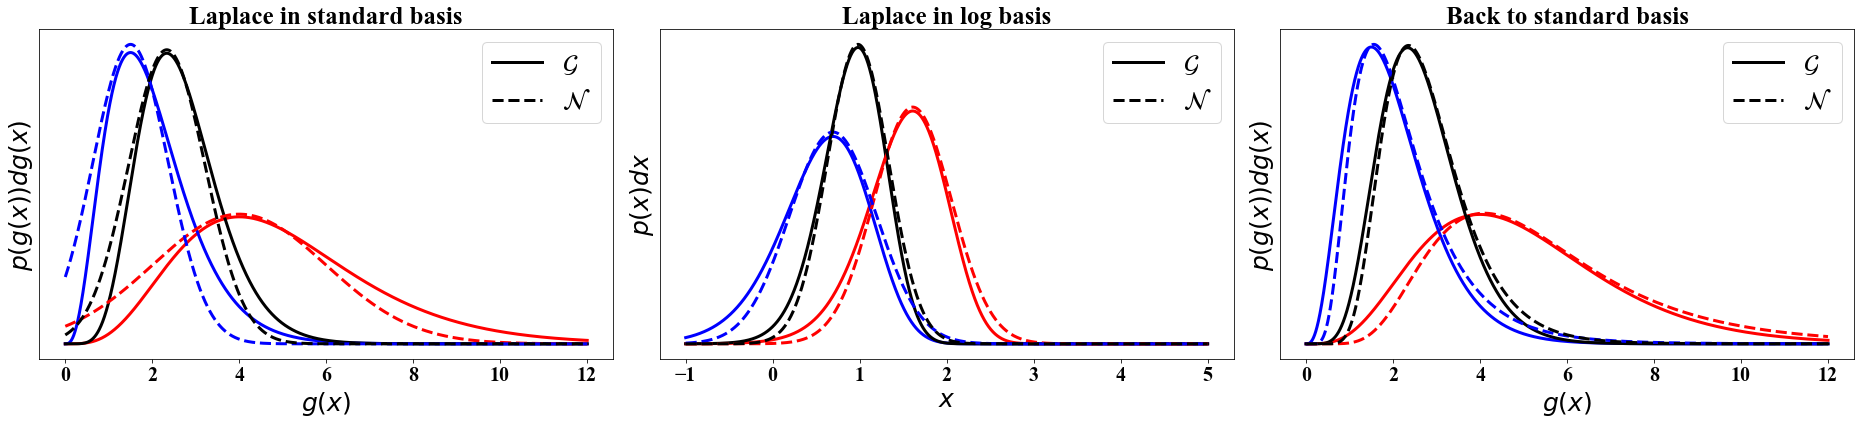

In [13]:
plot_gamma_t_log(params=[[5,1], [4,2], [8,3]], save=True, filename='Gamma_log_bridge.pdf', show_back=True)

## sqrt basis

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


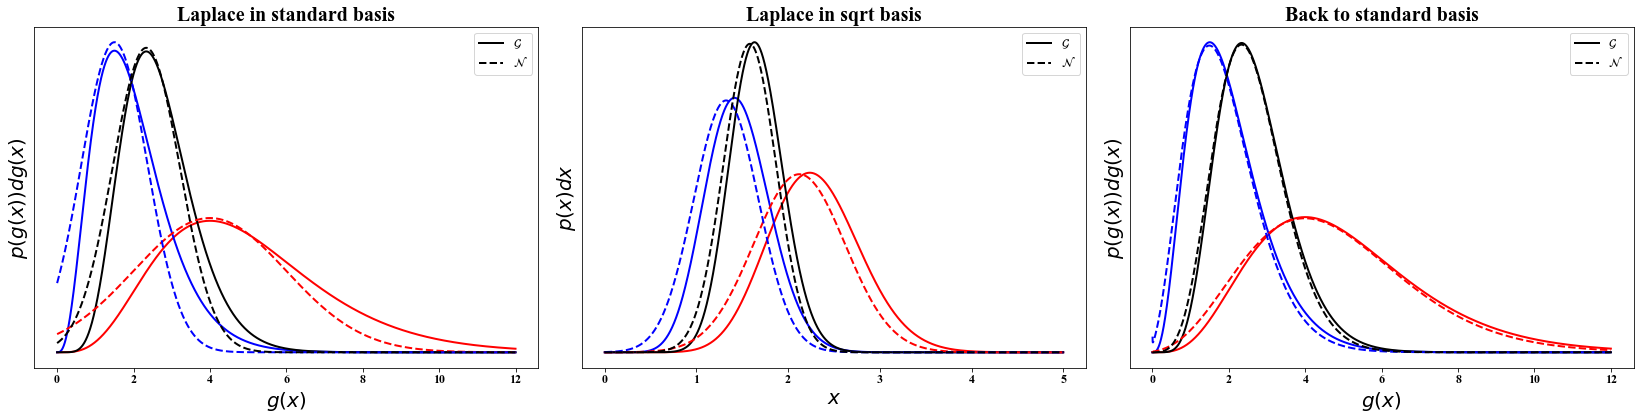

In [6]:
#change the basis, i.e. x -> t(x)

###########SQUARE###################
#square transform <-> sqrt basis

"""values"""
def plot_gamma_t_sqrt(params, save=False, filename='gamma_sqrt_bridge.pdf', show_back=False):

    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    #normal
    mode1 = gamma_mode(a1, l1)
    mode2 = gamma_mode(a2, l2)
    mode3 = gamma_mode(a3, l3)

    sigma1 = np.sqrt(gamma_var(a1, l1))
    sigma2 = np.sqrt(gamma_var(a2, l2))
    sigma3 = np.sqrt(gamma_var(a3, l3))

    x = np.linspace(0, 12, 12000 + 1)
    x_t = np.linspace(0, 5, 5000 + 1)
    y1 = gamma_pdf(x, a1, l1)
    y2 = gamma_pdf(x, a2, l2)
    y3 = gamma_pdf(x, a3, l3)
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #transform

    y1_t_sqrt = gamma_pdf_t_sqrt(x_t, a1, l1)
    y2_t_sqrt = gamma_pdf_t_sqrt(x_t, a2, l2)
    y3_t_sqrt = gamma_pdf_t_sqrt(x_t, a3, l3)
    mode1_t_sqrt = gamma_t_sqrt_mode(a1, l1)
    mode2_t_sqrt = gamma_t_sqrt_mode(a2, l2)
    mode3_t_sqrt = gamma_t_sqrt_mode(a3, l3)

    sigma1_t_sqrt = np.sqrt(gamma_t_sqrt_var(l1))
    sigma2_t_sqrt = np.sqrt(gamma_t_sqrt_var(l2))
    sigma3_t_sqrt = np.sqrt(gamma_t_sqrt_var(l3))
    lp_approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt) 
    lp_approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt) 
    lp_approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt) 

    #back transform
    y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt)
    y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt)
    y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt)

    """Plots"""
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw = 3

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(26,6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,4))
    
    
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw)
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[1].plot(x_t, lp_approx1_t_sqrt, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_sqrt, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_sqrt, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in sqrt basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});


    #"""
    axs[2].plot(x, y1, 'r-', lw=lw)
    axs[2].plot(x, y2, 'b-', lw=lw)
    axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{G}$");
    axs[2].plot(x, y1_back, 'r--', lw=lw)
    axs[2].plot(x, y2_back, 'b--', lw=lw)
    axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
    axs[2].set_yticklabels([])
    axs[2].set_yticks([])
    axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[2].set_title('Back to standard basis', fontsize=title_size)
    axs[2].legend(prop={'size': legend_size});
    #"""

    plt.tight_layout()
    if save:
        plt.savefig(filename)
    #tpl.save('Gamma_Bridge_log.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
    #         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})
    plt.show();

In [ ]:
plot_gamma_t_sqrt(params=[[5,1], [4,2], [8,3]], save=True, filename='Gamma_sqrt_bridge.pdf', show_back=True)

# Verify the Bridges

In [7]:
#verify the log bridge

def gamma_t_log_lambda(m,s): 
    return(1/(np.exp(m) * s**2))

def gamma_t_log_alpha(s):
    return(1/s**2)
    

test_a1, test_l1 = 3,4
test_m1, test_s1 = gamma_t_log_mode(test_a1, test_l1), np.sqrt(gamma_t_log_var(test_a1))
test_a2, test_l2 = gamma_t_log_alpha(test_s1), gamma_t_log_lambda(test_m1, test_s1)

print(test_a2, test_l2)

rand_a1, rand_l1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = gamma_t_log_mode(rand_a1, rand_l1), np.sqrt(gamma_t_log_var(rand_a1))
rand_a2, rand_l2 = gamma_t_log_alpha(rand_s1), gamma_t_log_lambda(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_l1, rand_l2))

3.0 4.0


In [8]:
#verify the sqrt bridge

def gamma_t_sqrt_lambda(s): 
    return(1/(4*s**2))

def gamma_t_sqrt_alpha(m, s):
    return(m**2/(4*s**2) + 0.5)
    
    

test_a3, test_l3 = 5,6
test_m3, test_s3 = gamma_t_sqrt_mode(test_a3, test_l3), np.sqrt(gamma_t_sqrt_var(test_l3))
test_a4, test_l4 = gamma_t_sqrt_alpha(test_m3, test_s3), gamma_t_sqrt_lambda(test_s3)

print(test_a4, test_l4)

rand_a3, rand_l3 = np.random.random()+1, np.random.random()+1
rand_m3, rand_s3 = gamma_t_sqrt_mode(rand_a3, rand_l3), np.sqrt(gamma_t_sqrt_var(rand_l3))
rand_a4, rand_l4 = gamma_t_sqrt_alpha(rand_m3, rand_s3), gamma_t_sqrt_lambda(rand_s3)

assert(np.allclose(rand_a3, rand_a4))
assert(np.allclose(rand_l3, rand_l4))

5.0 6.0


# Statistical distance measures

## starting with MMD for one set of parameters

In [9]:
# look at MMD
from torch_two_sample import MMDStatistic
from scipy.stats import norm, gamma
import torch

In [10]:
# set up samples with respective stats
# test in standard basis
n_samples = 5000

a1, l1 = 4, 3

mode1 = gamma_mode(a1, l1)

sigma1 = np.sqrt(gamma_var(a1, l1))

G_samples = gamma.rvs(a1, scale=1/l1, size=n_samples)
N_samples = norm.rvs(mode1, sigma1, size=n_samples)

MMD_test = MMDStatistic(n_samples, n_samples)

G_samples = torch.Tensor(G_samples.reshape((n_samples, -1)))
N_samples = torch.Tensor(N_samples.reshape((n_samples, -1)))
#MMD_test_value, matrix = MMD_test(G_samples, N_samples,  alphas=[0.5], ret_matrix=True)
MMD_test_value = MMD_test(G_samples, N_samples,  alphas=[0.5], ret_matrix=False)

print(MMD_test_value)
#print(MMD_test.pval(matrix, n_permutations=100))

tensor(0.0331)


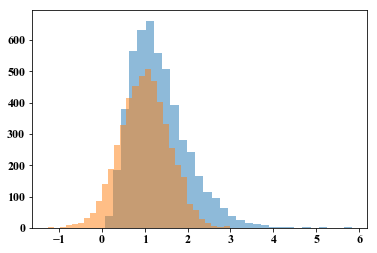

In [11]:
G_samples = G_samples.reshape(-1)
N_samples = N_samples.reshape(-1)
plt.hist(G_samples, bins = 30, alpha = 0.5)
plt.hist(N_samples, bins = 30, alpha = 0.5)
plt.show();

In [12]:
# set up samples with respective stats
# test in log basis

n_samples = 5000

a1, l1 = 4,3

mode1_log = gamma_t_log_mode(a1, l1)

sigma1_log = np.sqrt(gamma_t_log_var(a1))

G_samples_log = np.log(gamma.rvs(a1, scale=1/l1, size=n_samples))
N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)

MMD_test = MMDStatistic(n_samples, n_samples)

G_samples_log = torch.Tensor(G_samples_log.reshape((n_samples, -1)))
N_samples_log = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
#MMD_test_value, matrix = MMD_test(G_samples_log, N_samples_log,  alphas=[0.5], ret_matrix=True)
MMD_test_value = MMD_test(G_samples_log, N_samples_log,  alphas=[0.5], ret_matrix=False)

print(MMD_test_value)
#print(MMD_test.pval(matrix, n_permutations=100))

tensor(0.0059)


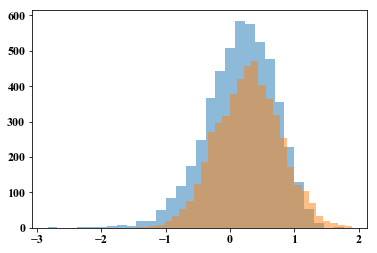

In [13]:
G_samples_log = G_samples_log.reshape(-1)
N_samples_log = N_samples_log.reshape(-1)
plt.hist(G_samples_log, bins = 30, alpha=0.5)
plt.hist(N_samples_log, bins = 30, alpha=0.5)
plt.show();

In [14]:
# set up samples with respective stats
# test in sqrt basis
n_samples = 5000

a1, l1 = 4,3

mode1_sqrt = gamma_t_sqrt_mode(a1, l1)

sigma1_sqrt = np.sqrt(gamma_t_sqrt_var(l1))

G_samples_sqrt = np.sqrt(gamma.rvs(a1, scale=1/l1, size=n_samples))
N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)

MMD_test = MMDStatistic(n_samples, n_samples)

G_samples_sqrt = torch.Tensor(G_samples_sqrt.reshape((n_samples, -1)))
N_samples_sqrt = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
#MMD_test_value, matrix = MMD_test(G_samples_sqrt, N_samples_sqrt,  alphas=[0.5], ret_matrix=True)
MMD_test_value = MMD_test(G_samples_sqrt, N_samples_sqrt,  alphas=[0.5], ret_matrix=False)

print(MMD_test_value)
#print(MMD_test.pval(matrix, n_permutations=100))

tensor(0.0007)


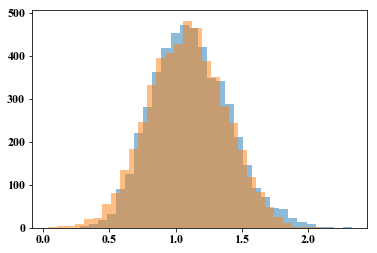

In [15]:
G_samples_sqrt = G_samples_sqrt.reshape(-1)
N_samples_sqrt = N_samples_sqrt.reshape(-1)
plt.hist(G_samples_sqrt, bins = 30, alpha=0.5)
plt.hist(N_samples_sqrt, bins = 30, alpha=0.5)
plt.show();

## MMD from 100 combinations of parameters

In [16]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params[0]
    Ls = params[1]
    #As = [5,4,8]
    #Ls = [1, 2, 3]

    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for a in As:
        for l in Ls:

            if verbose:
                print("a: ", a, "l: ", l)

            if a < 1:
                print("a < 1: not legitimate in standard base")

            #get samples from all dists
            #standard
            G_samples = gamma.rvs(a, scale=1/l, size=n_samples)
            if a >= 1:
                mode1 = gamma_mode(a, l)
                sigma1 = np.sqrt(gamma_var(a, l))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)

            #log
            mode1_log = gamma_t_log_mode(a, l)
            sigma1_log = np.sqrt(gamma_t_log_var(a))
            G_samples_log = np.log(G_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)

            #sqrt
            mode1_sqrt = gamma_t_sqrt_mode(a, l)
            sigma1_sqrt = np.sqrt(gamma_t_sqrt_var(l))
            G_samples_sqrt = np.sqrt(G_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)


            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)

            #standard
            G_samples_ = torch.Tensor(G_samples.reshape((n_samples, -1)))
            if a >= 1:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(G_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            else:
                MMD_ = torch.Tensor([np.nan])

            #log
            G_samples_log_ = torch.Tensor(G_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(G_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)

            #sqrt
            G_samples_sqrt_ = torch.Tensor(G_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(G_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(G_samples, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()

                axs[1].hist(G_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()

                axs[2].hist(G_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()

                plt.show()

            if verbose: 
                print("standard: ", MMD_.item(), "log: ", MMD_log_.item(), "sqrt: ", MMD_sqrt_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [17]:
MMD_combinations(params=[range(1,11), range(2,12)], plot=False, verbose=True, n_samples=2000)

a:  1 l:  2
standard:  0.16135096549987793 log:  0.023852944374084473 sqrt:  0.011968851089477539
a:  1 l:  3
standard:  0.08762162923812866 log:  0.02680981159210205 sqrt:  0.008036434650421143
a:  1 l:  4
standard:  0.0561448335647583 log:  0.016507983207702637 sqrt:  0.009229660034179688
a:  1 l:  5
standard:  0.03592121601104736 log:  0.026179611682891846 sqrt:  0.004859268665313721
a:  1 l:  6
standard:  0.026128649711608887 log:  0.02926427125930786 sqrt:  0.004750192165374756
a:  1 l:  7
standard:  0.01873725652694702 log:  0.02981334924697876 sqrt:  0.0046800971031188965
a:  1 l:  8
standard:  0.015186488628387451 log:  0.023114800453186035 sqrt:  0.0042092204093933105
a:  1 l:  9
standard:  0.011849701404571533 log:  0.02108067274093628 sqrt:  0.0030624866485595703
a:  1 l:  10
standard:  0.009896993637084961 log:  0.021910369396209717 sqrt:  0.002908647060394287
a:  1 l:  11
standard:  0.008128106594085693 log:  0.0239565372467041 sqrt:  0.003485560417175293
a:  2 l:  2
stand

standard:  0.01241755485534668 log:  0.0017632842063903809 sqrt:  0.0005756616592407227
a:  9 l:  5
standard:  0.011154711246490479 log:  0.003324747085571289 sqrt:  0.00028902292251586914
a:  9 l:  6
standard:  0.00878685712814331 log:  0.001667022705078125 sqrt:  -3.540515899658203e-05
a:  9 l:  7
standard:  0.01327812671661377 log:  0.0019008517265319824 sqrt:  0.00016647577285766602
a:  9 l:  8
standard:  0.010644733905792236 log:  0.0016050338745117188 sqrt:  0.0002536773681640625
a:  9 l:  9
standard:  0.009579718112945557 log:  0.0020438432693481445 sqrt:  0.00038188695907592773
a:  9 l:  10
standard:  0.006579577922821045 log:  0.0010663866996765137 sqrt:  0.0002689361572265625
a:  9 l:  11
standard:  0.006062567234039307 log:  0.001513361930847168 sqrt:  0.0001653432846069336
a:  10 l:  2
standard:  0.006049364805221558 log:  0.001834869384765625 sqrt:  4.088878631591797e-05
a:  10 l:  3
standard:  0.013808131217956543 log:  0.001044154167175293 sqrt:  0.0009747743606567383
a:

(1.8447425365447998, 0.7077540159225464, 0.1074211597442627)

In [18]:
results_MMD = np.array([1.5901501178741455, 0.4570021629333496, 0.07232928276062012])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.28739561 0.04548582]


## KL-divergence (mode seeking/backward, from PDF)

In [19]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [20]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(np.abs(KL_div))
    
    #normalize for comparison
    KL_div /= np.max(pdf_1)
        
    return(KL_div)

In [21]:
def adjust_dist(a, l, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "log":
        x_large = np.linspace(-1000, 1000, 2000)
    else:
        x_large = np.linspace(0.0001, 1000, 1000)
        
    if base == "standard":
        
        mode = gamma_mode(a, l)
        sigma = np.sqrt(gamma_var(a, l))
        
        #get the range of x
        G_pdf_large = gamma_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        upper = np.max([np.sum(G_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        G_pdf = gamma_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, G_pdf, N_pdf)
    
    if base == "sqrt":
        
        mode_sqrt = gamma_t_sqrt_mode(a, l)
        sigma_sqrt = np.sqrt(gamma_t_sqrt_var(l))
        
        #get the range of x
        G_pdf_large = gamma_pdf_t_sqrt(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_sqrt, sigma_sqrt)
        upper = np.max([np.sum(G_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper+1, 1000)
        
        #now do the actual pdfs
        G_pdf = gamma_pdf_t_sqrt(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode_sqrt, sigma_sqrt)
        
        return(x_plus, G_pdf, N_pdf)
    
    if base == "log":
        
        mode_log = gamma_t_log_mode(a, l)
        sigma_log = np.sqrt(gamma_t_log_var(a))
        
        #get the range of x
        G_pdf_large = gamma_pdf_t_log(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_log, sigma_log)
        range_ = np.max([np.sum(G_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        lower = mode_log - range_/2
        upper = mode_log + range_/2
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        G_pdf = gamma_pdf_t_log(x, a, l)
        N_pdf = normal_pdf(x, mode_log, sigma_log)
        
        return(x, G_pdf, N_pdf)
        
        
        

In [22]:
x, G_pdf, N_pdf = adjust_dist(5,1, 'standard')
x_sqrt, G_pdf_sqrt, N_pdf_sqrt = adjust_dist(5,1, 'sqrt')
x_log, G_pdf_log, N_pdf_log = adjust_dist(5,1, 'log')

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater


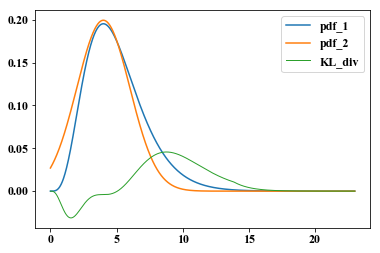

71.72355694772355

In [23]:
KL_divergence_pdf(x, G_pdf, N_pdf, plot=True)

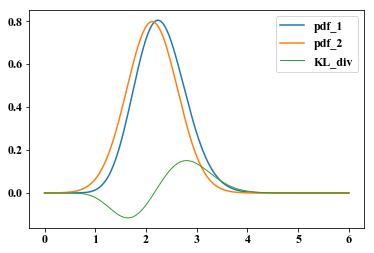

50.28838559942487

In [24]:
KL_divergence_pdf(x_sqrt, G_pdf_sqrt, N_pdf_sqrt, plot=True)

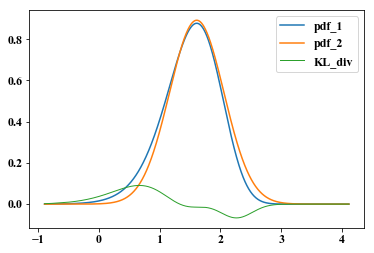

32.26593857244592

In [25]:
KL_divergence_pdf(x_log, G_pdf_log, N_pdf_log, plot=True)

In [26]:
def KL_div_pdf_combinations(params, plot=False, verbose=True):
    
    As = params[0]
    Ls = params[1]
    #As = [5,4,8]
    #Ls = [1, 2, 3]

    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:

            if verbose:
                print("a: ", a, "l: ", l)

            if a < 1:
                print("a < 1: not legitimate in standard base")

            #get the ranges and pdfs
            if a >= 1:
                x, G_pdf, N_pdf = adjust_dist(a,l, 'standard')
            x_sqrt, G_pdf_sqrt, N_pdf_sqrt = adjust_dist(a,l, 'sqrt')
            x_log, G_pdf_log, N_pdf_log = adjust_dist(a,l, 'log')

            #calculate the KL divergences for all bases
            if a >= 1:
                KL_div_ = KL_divergence_pdf(x, G_pdf, N_pdf, plot=plot)
            KL_div_log_ = KL_divergence_pdf(x_log, G_pdf_log, N_pdf_log, plot=plot)
            KL_div_sqrt_ = KL_divergence_pdf(x_sqrt, G_pdf_sqrt, N_pdf_sqrt, plot=plot) 

            #add them to their respective sums
            if a >= 1:
                KL_div_sum += KL_div_
            else:
                KL_div_sum += np.nan
            KL_div_t_log_sum += KL_div_log_
            KL_div_t_sqrt_sum += KL_div_sqrt_

            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [27]:
print(KL_div_pdf_combinations(params = [range(2,12), range(1,11)], plot=False, verbose=False))

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':


(6974.056106346181, 2892.5964552805867, 3945.3256669743514)


In [28]:
results_KL_pdf = np.array([5532.063818400539, 815.4892931828754, 2248.595138420037])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.1474114  0.40646587]


## KL-divergence (mode seeking/backward, from samples)

In [31]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_samples(samples_1, samples_2, plot=False):
    
    assert(len(samples_1) == len(samples_2))
    n_bins = int(np.sqrt(len(samples_1)))
    
    if not isinstance(samples_1, np.ndarray):
        samples_1 = samples_1.numpy()
        samples_2 = samples_2.numpy()
    
    samples_1_min, samples_1_max = np.min(samples_1), np.max(samples_1)
    samples_2_min, samples_2_max = np.min(samples_2), np.max(samples_2)
    
    lb = np.min([samples_1_min, samples_2_min])
    ub = np.max([samples_1_max, samples_2_max])
    
    #make histograms
    hist1, _ = np.histogram(samples_1, range=[lb, ub], density=True, bins=n_bins)
    hist2, _ = np.histogram(samples_2, range=[lb, ub], density=True, bins=n_bins)
    
    #print(hist1)
    #print(hist2)
    
    #don't divide by 0
    hist1 += 1e-8
    hist2 += 1e-8
    
    #calculate KL_div
    KL_div = (hist1 * np.log(hist1 / hist2))

    if plot:
        plt.plot(hist1, label='hist1')
        plt.plot(hist2, label='hist2')
        plt.plot(KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(KL_div)/n_bins
        
    return(KL_div)

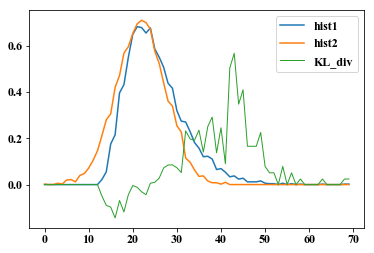

0.06682142451763125


In [32]:
print(KL_divergence_samples(G_samples, N_samples, plot=True))

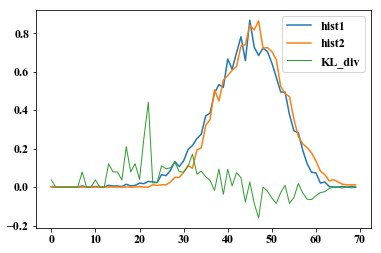

0.030943198157505885


In [33]:
print(KL_divergence_samples(G_samples_log, N_samples_log, plot=True))

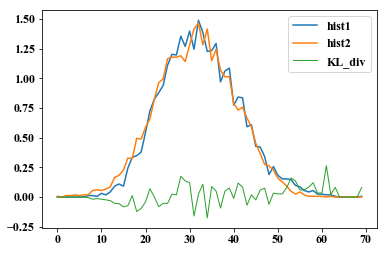

0.01695866913739373


In [34]:
print(KL_divergence_samples(G_samples_sqrt, N_samples_sqrt, plot=True))

In [35]:
def KL_div_samples_combinations(params, n_samples=10000, plot=False):
    
    #As = range(2, 12)
    #Ls = range(1, 11)
    As = params[0]
    Ls = params[1]

    KL_div = 0
    KL_div_t_sqrt = 0
    KL_div_t_log = 0 

    for a in As:
        for l in Ls:
            
            print("a: ", a, "l: ", l)
            
            #standard base
            mode = gamma_mode(a, l)
            sigma = np.sqrt(gamma_var(a, l))
            G_samples = gamma.rvs(a, scale=1/l, size=n_samples)
            N_samples = norm.rvs(mode, sigma, size=n_samples)
            
            #log base
            mode_log = gamma_t_log_mode(a, l)
            sigma_log = np.sqrt(gamma_t_log_var(a))
            G_samples_log = np.log(G_samples)
            N_samples_log = norm.rvs(mode_log, sigma_log, size=n_samples)
            
            #sqrt base
            mode_sqrt = gamma_t_sqrt_mode(a, l)
            sigma_sqrt = np.sqrt(gamma_t_sqrt_var(l))
            G_samples_sqrt = np.sqrt(G_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma_sqrt, size=n_samples)
             
            #add KL divs
            KL_div += KL_divergence_samples(G_samples, N_samples, plot=plot)
            KL_div_t_log += KL_divergence_samples(G_samples_log, N_samples_log, plot=plot)
            KL_div_t_sqrt += KL_divergence_samples(G_samples_sqrt, N_samples_sqrt, plot=plot)
            
    return(KL_div, KL_div_t_log, KL_div_t_sqrt)

a:  1 l:  2


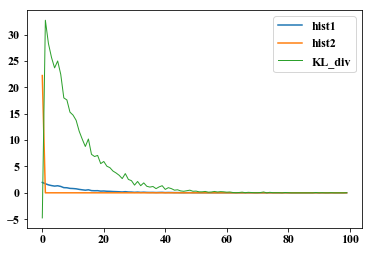

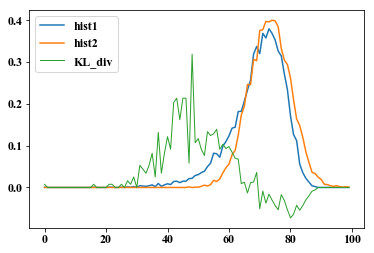

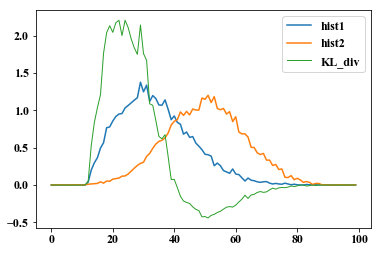

a:  1 l:  3


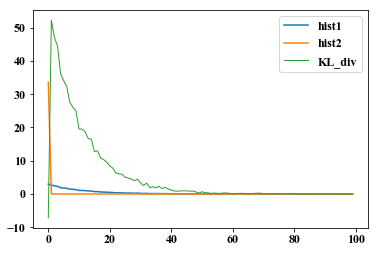

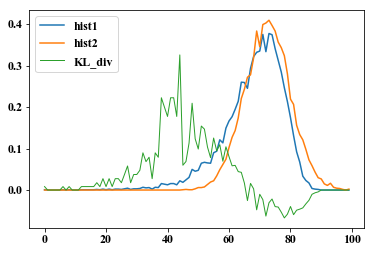

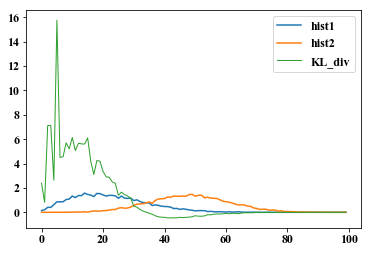

a:  1 l:  4


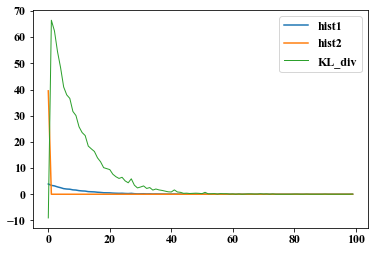

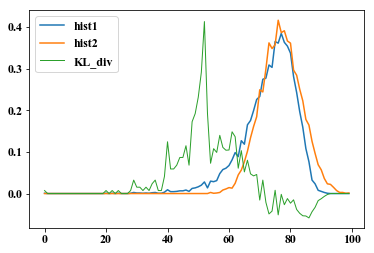

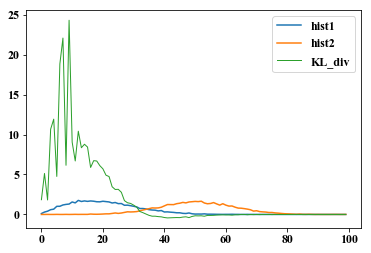

a:  1 l:  5


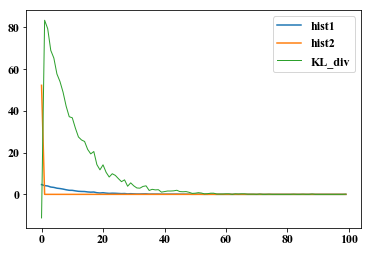

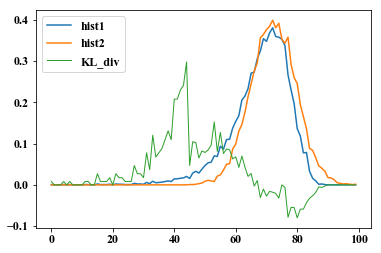

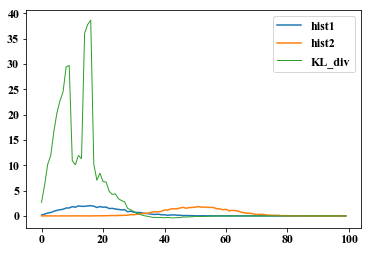

a:  1 l:  6


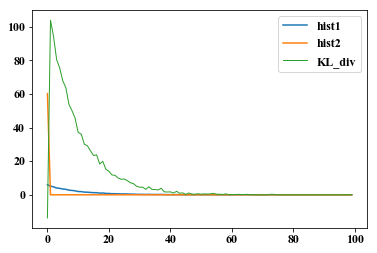

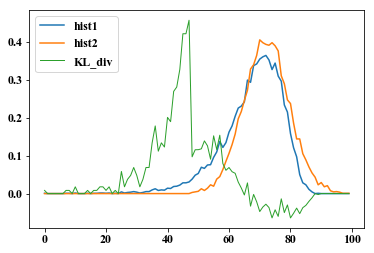

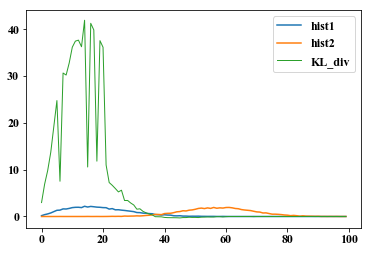

a:  1 l:  7


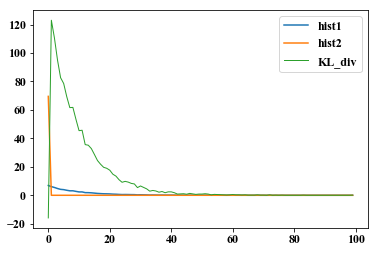

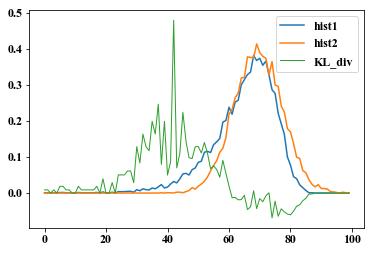

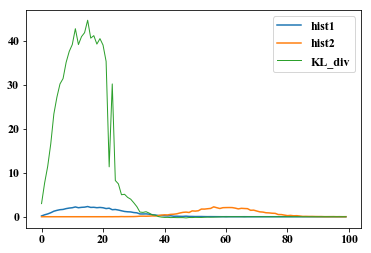

a:  1 l:  8


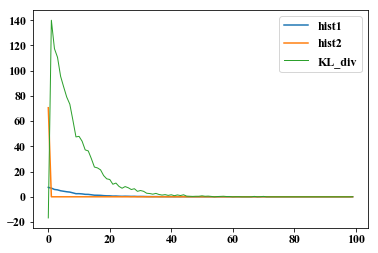

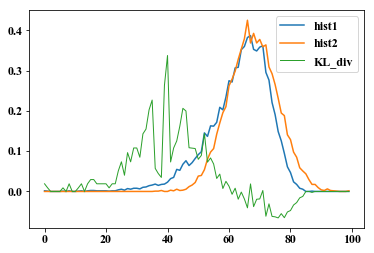

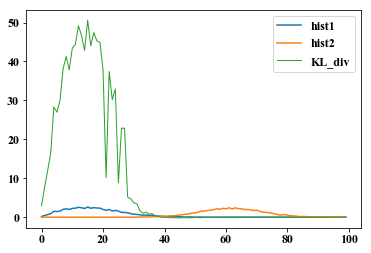

a:  1 l:  9


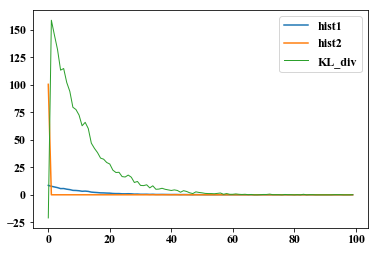

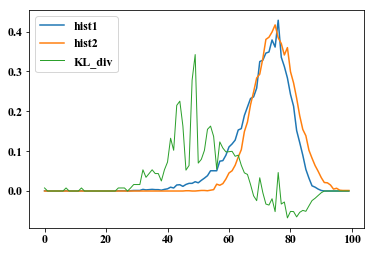

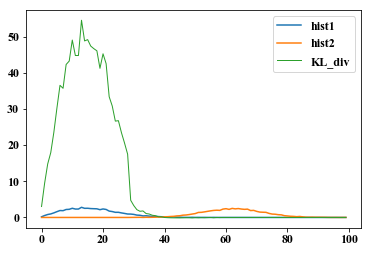

a:  1 l:  10


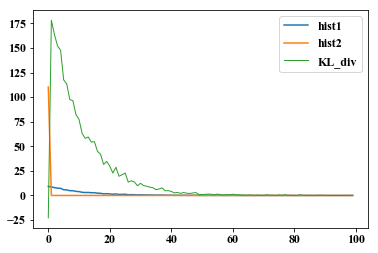

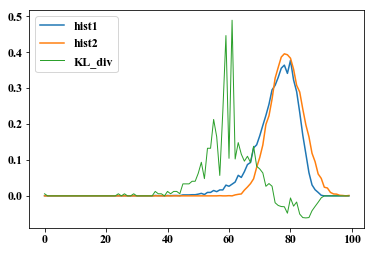

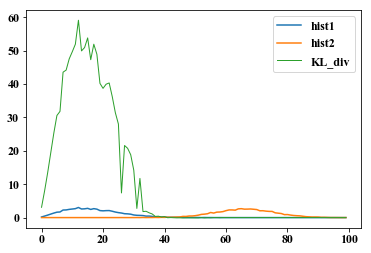

a:  1 l:  11


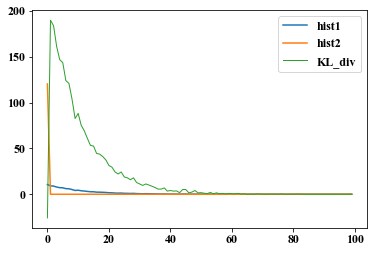

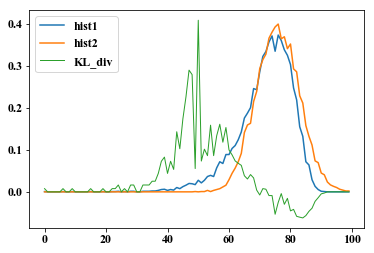

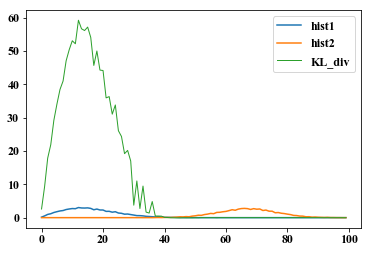

a:  2 l:  2


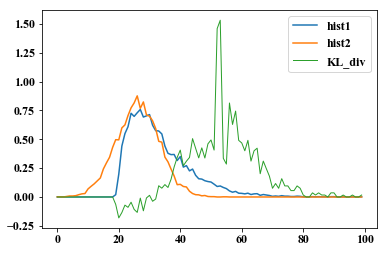

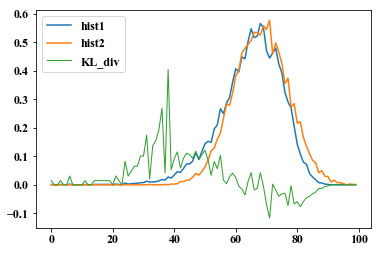

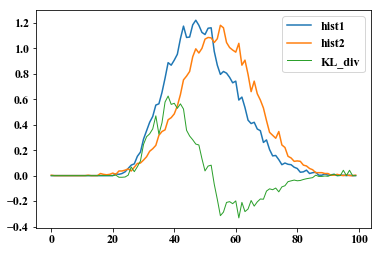

a:  2 l:  3


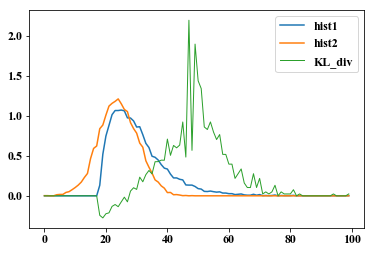

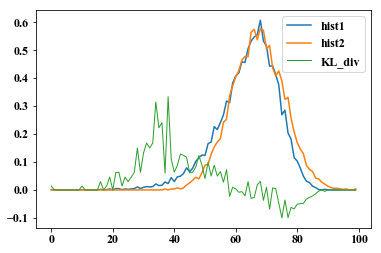

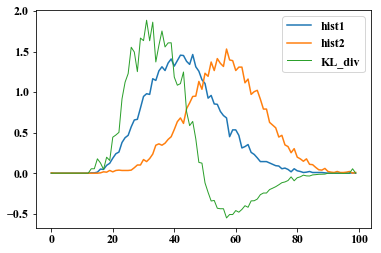

a:  2 l:  4


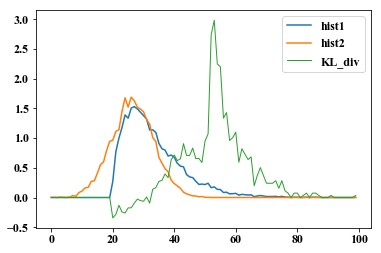

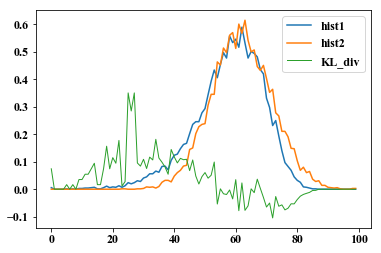

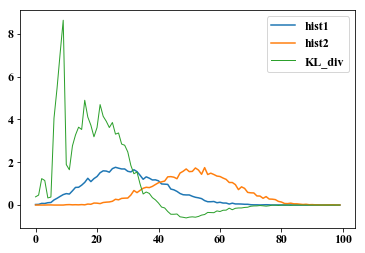

a:  2 l:  5


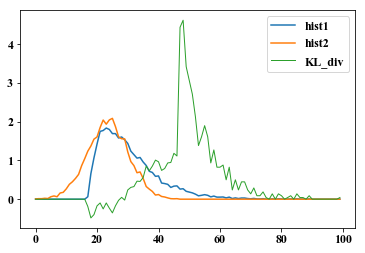

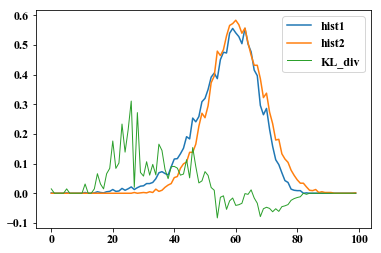

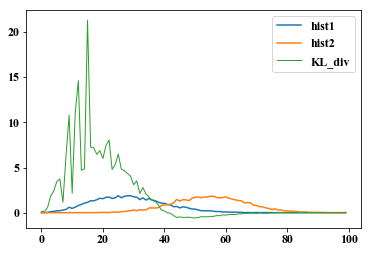

a:  2 l:  6


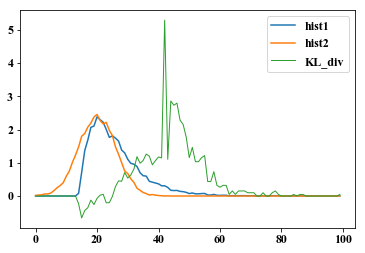

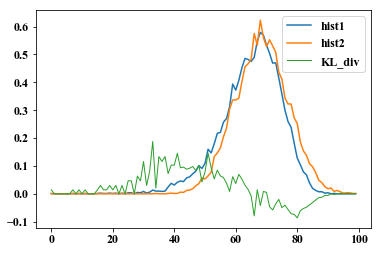

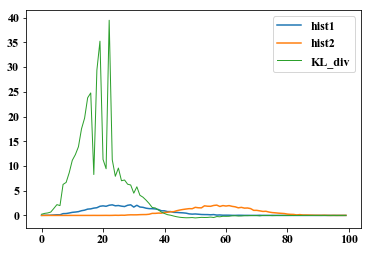

a:  2 l:  7


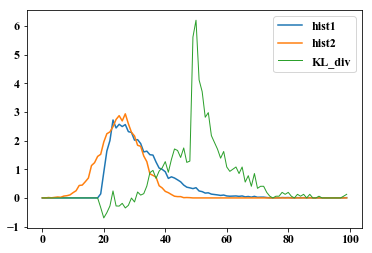

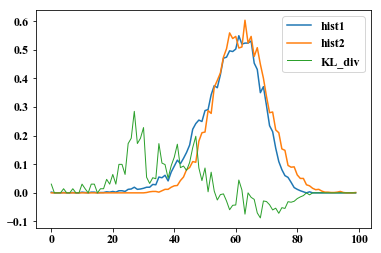

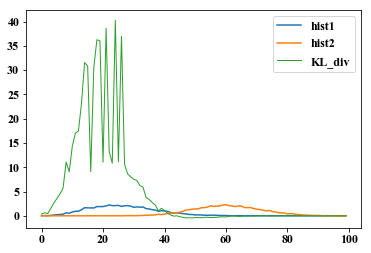

a:  2 l:  8


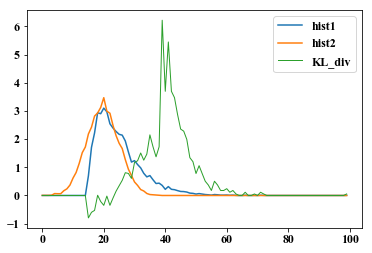

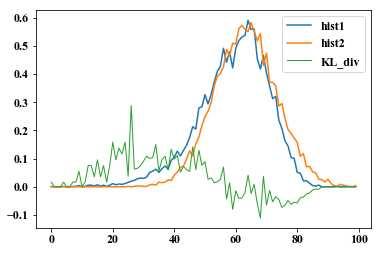

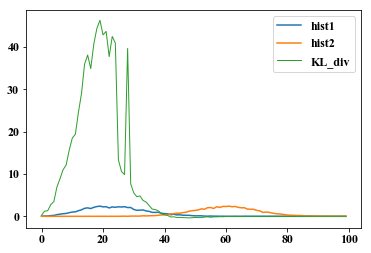

a:  2 l:  9


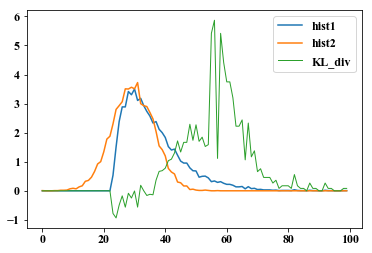

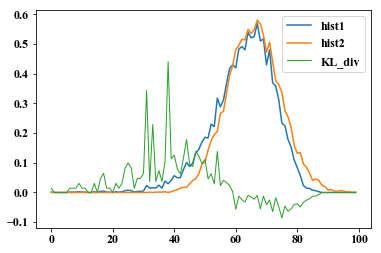

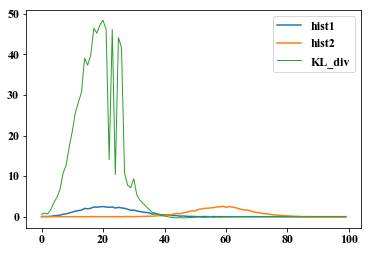

a:  2 l:  10


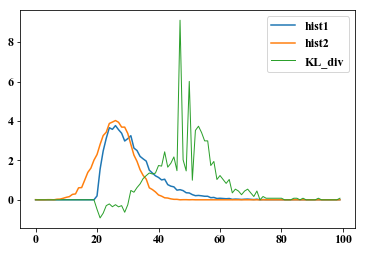

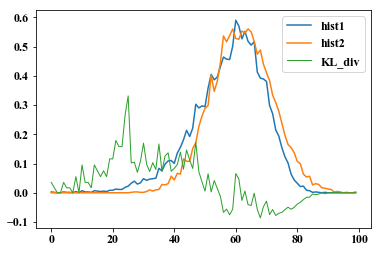

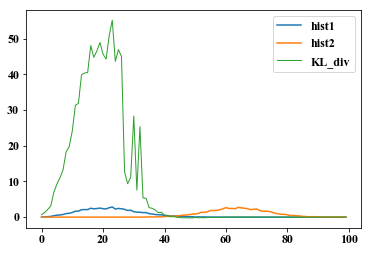

a:  2 l:  11


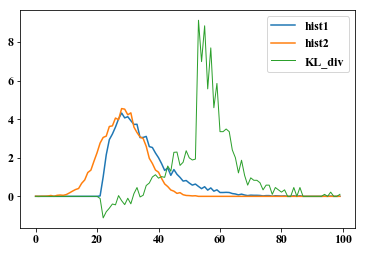

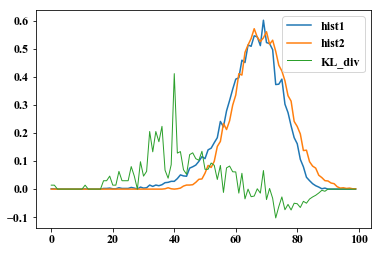

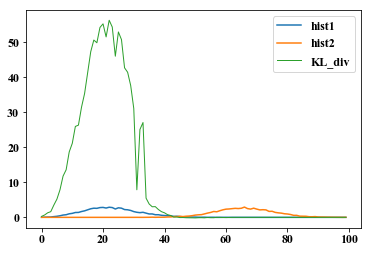

a:  3 l:  2


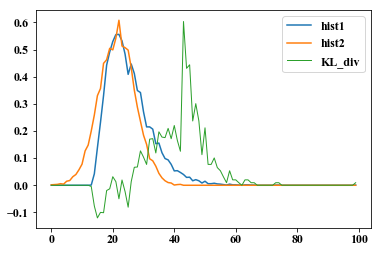

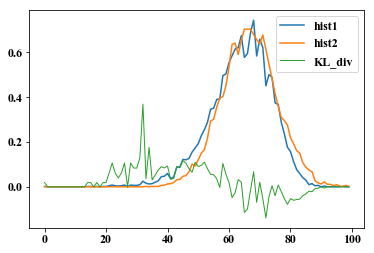

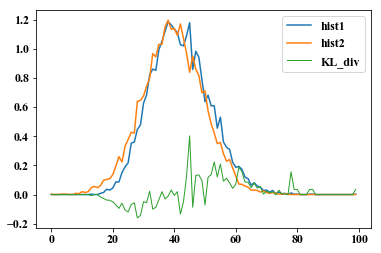

a:  3 l:  3


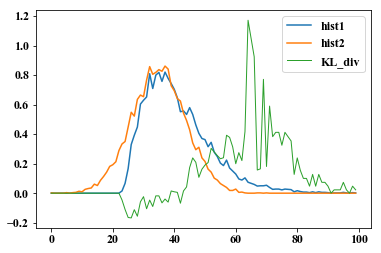

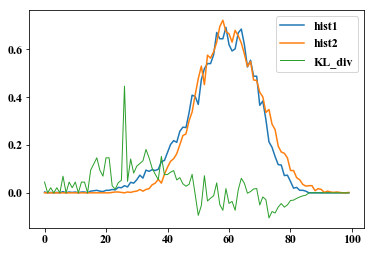

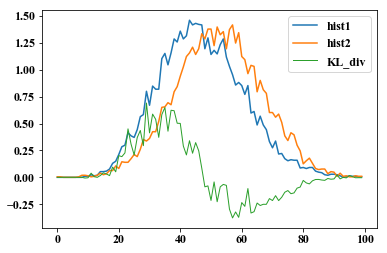

a:  3 l:  4


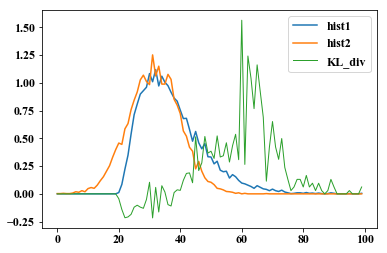

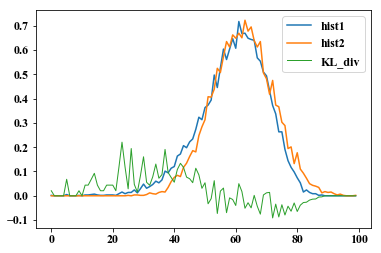

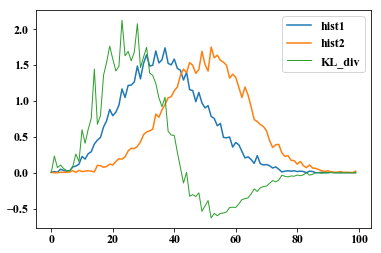

a:  3 l:  5


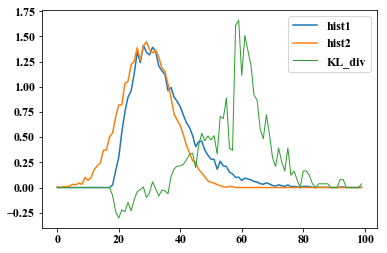

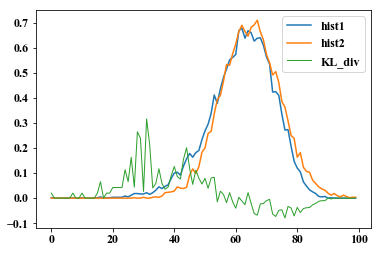

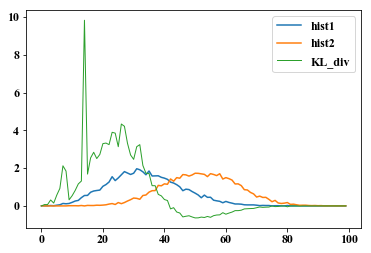

a:  3 l:  6


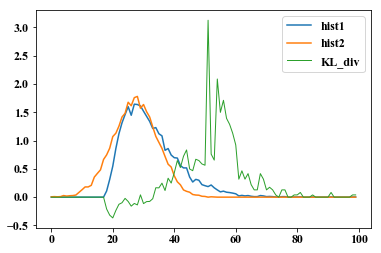

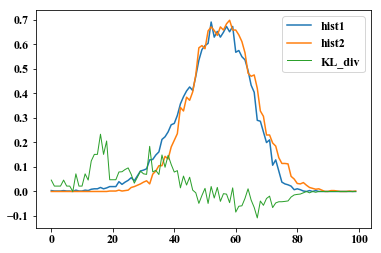

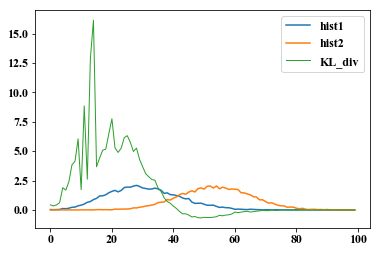

a:  3 l:  7


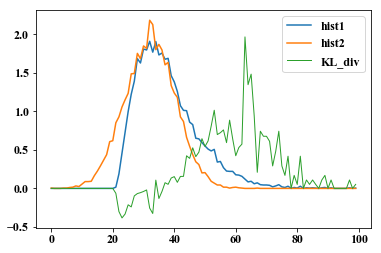

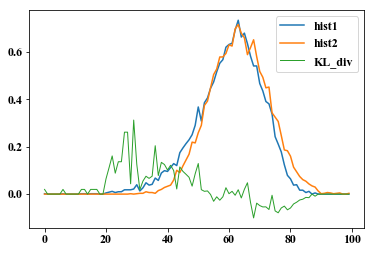

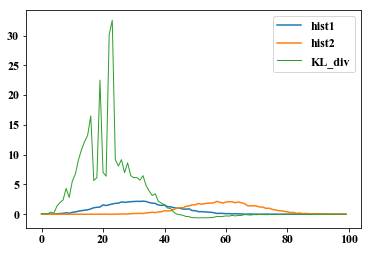

a:  3 l:  8


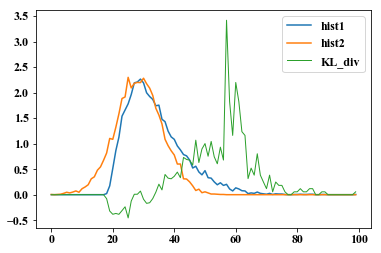

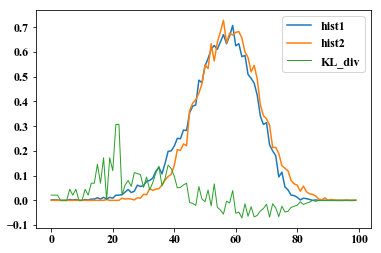

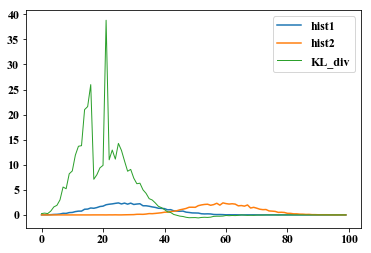

a:  3 l:  9


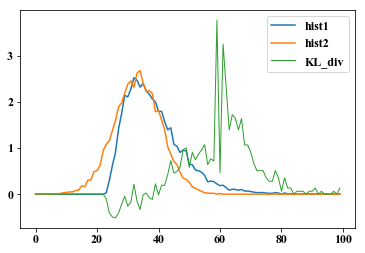

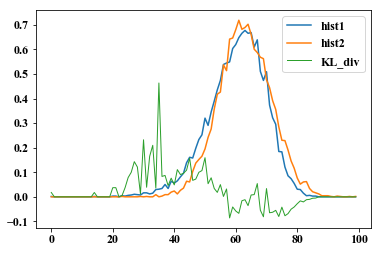

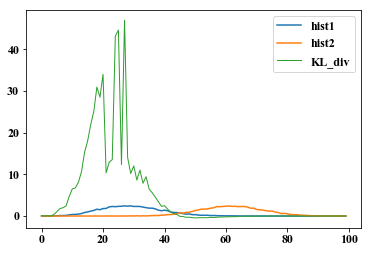

a:  3 l:  10


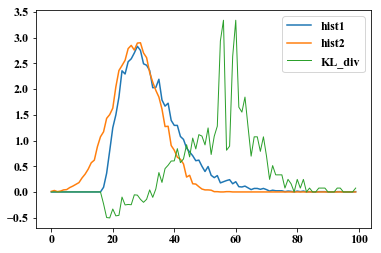

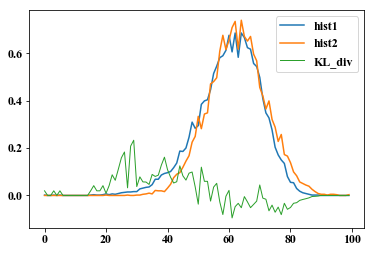

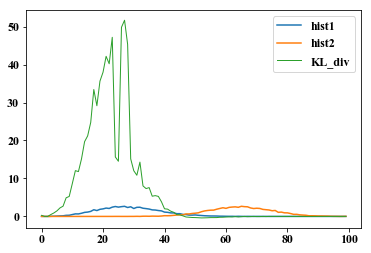

a:  3 l:  11


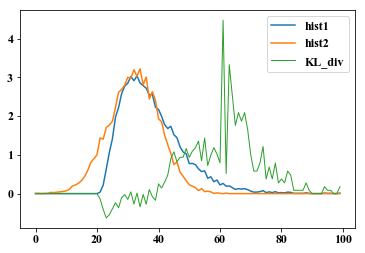

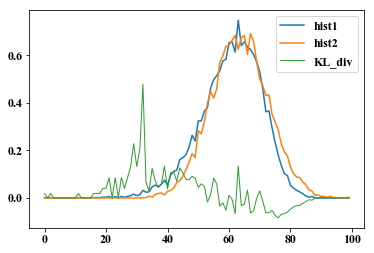

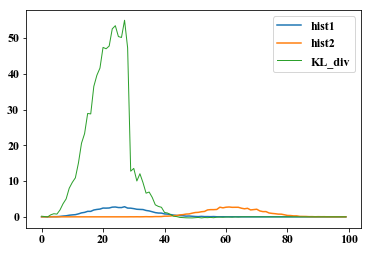

a:  4 l:  2


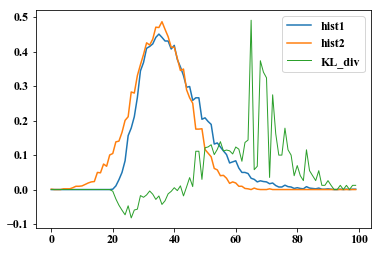

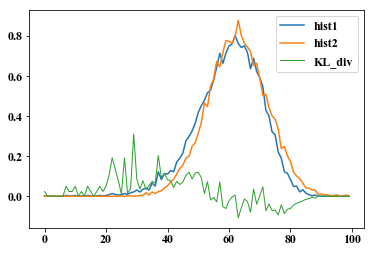

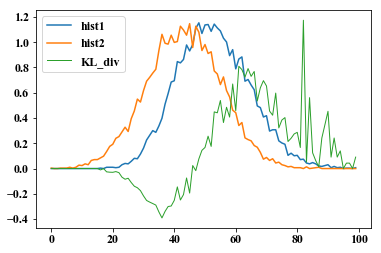

a:  4 l:  3


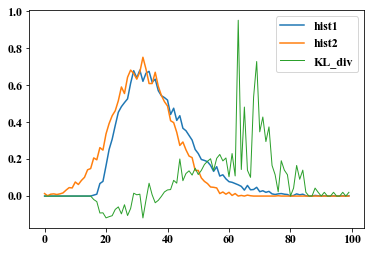

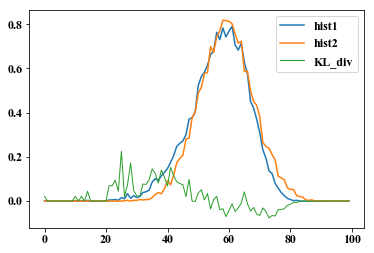

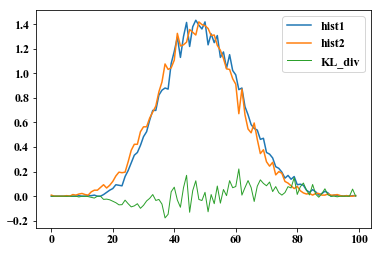

a:  4 l:  4


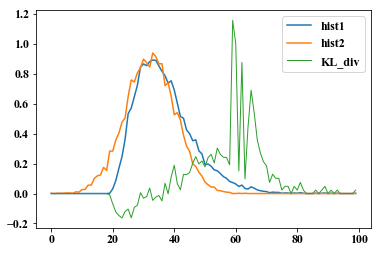

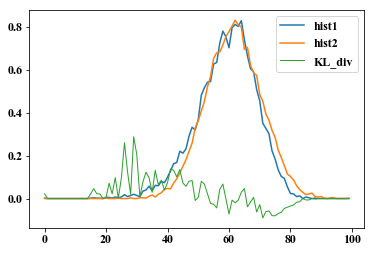

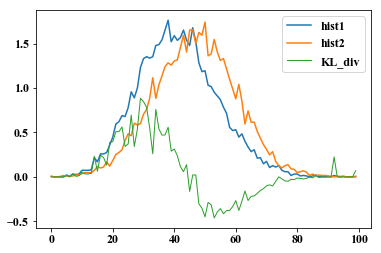

a:  4 l:  5


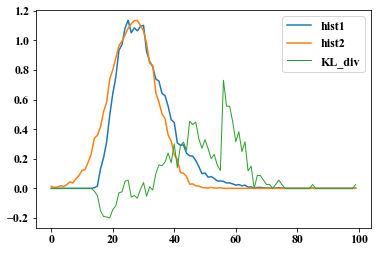

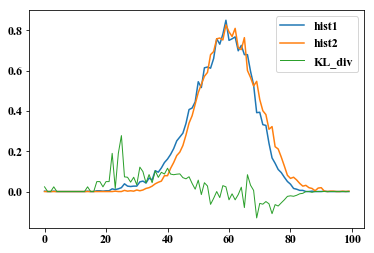

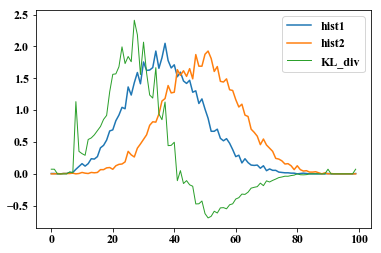

a:  4 l:  6


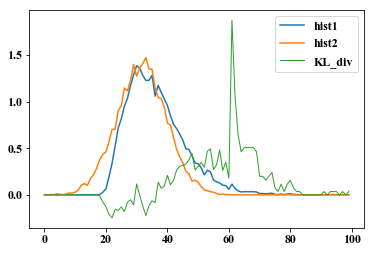

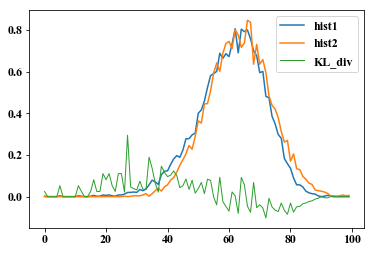

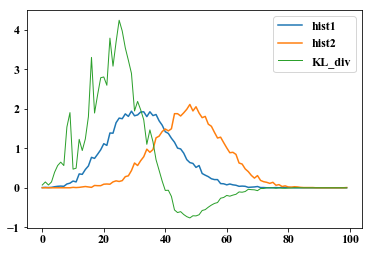

a:  4 l:  7


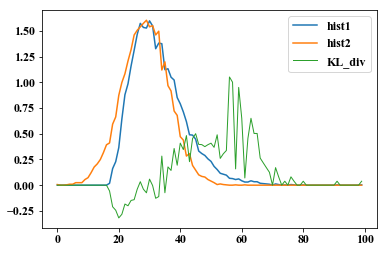

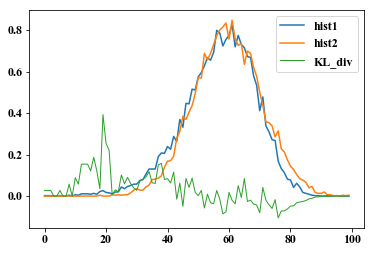

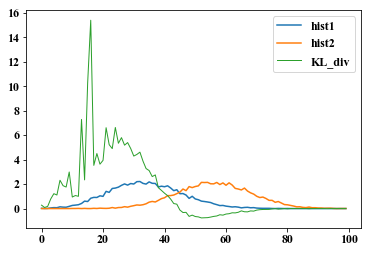

a:  4 l:  8


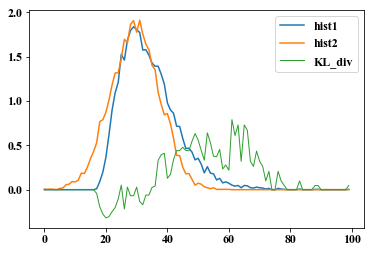

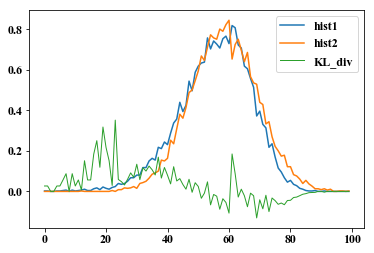

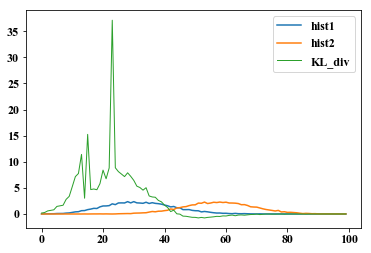

a:  4 l:  9


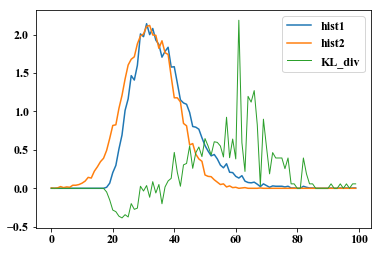

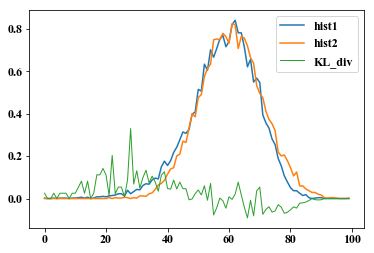

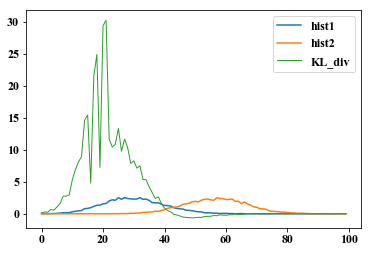

a:  4 l:  10


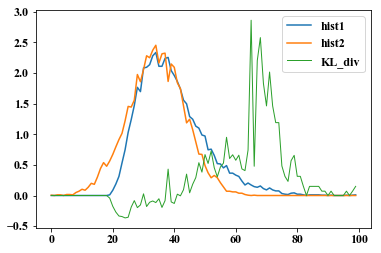

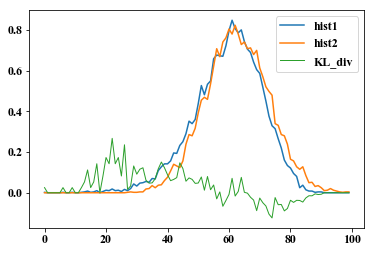

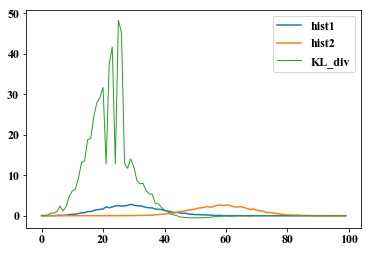

a:  4 l:  11


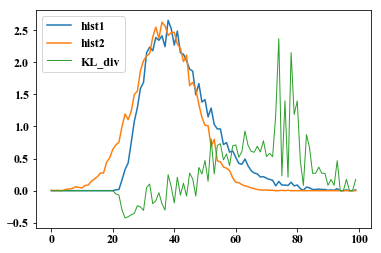

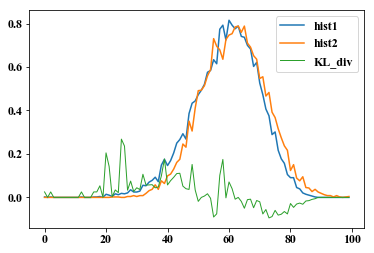

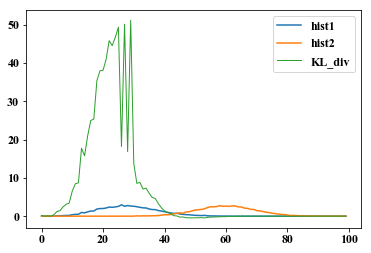

a:  5 l:  2


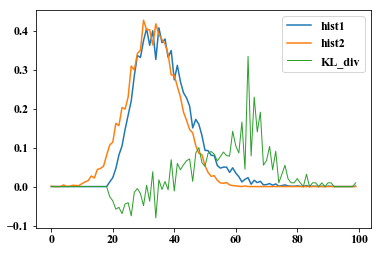

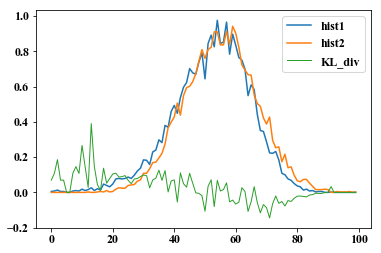

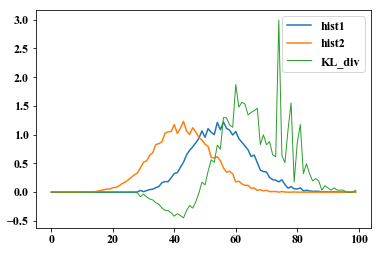

a:  5 l:  3


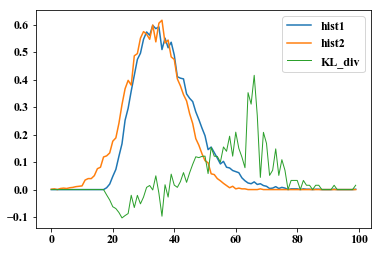

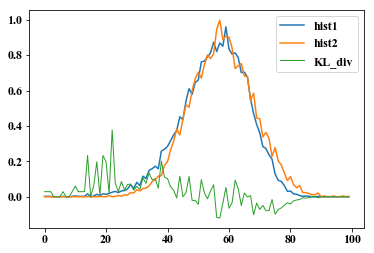

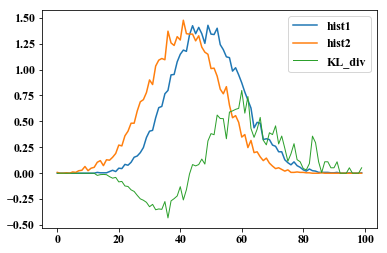

a:  5 l:  4


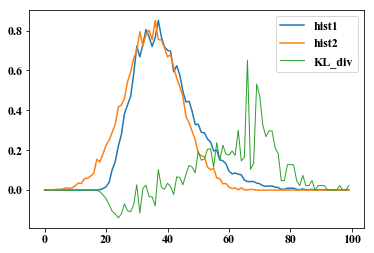

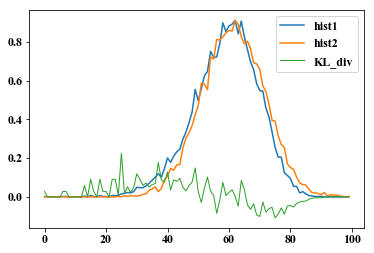

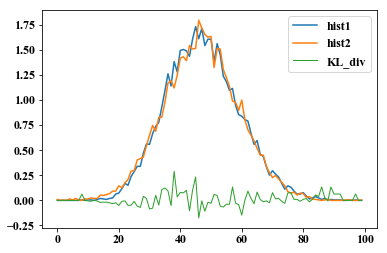

a:  5 l:  5


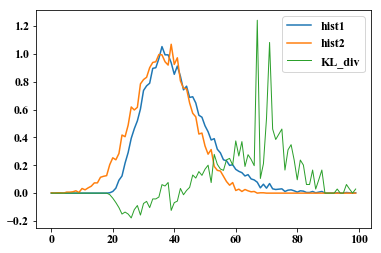

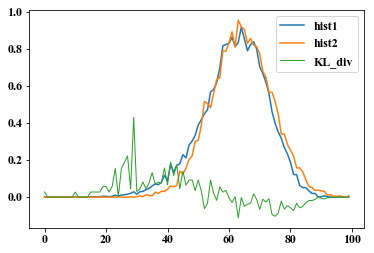

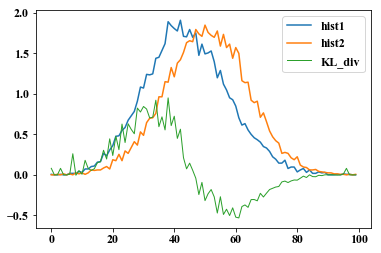

a:  5 l:  6


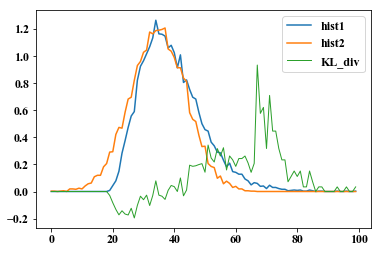

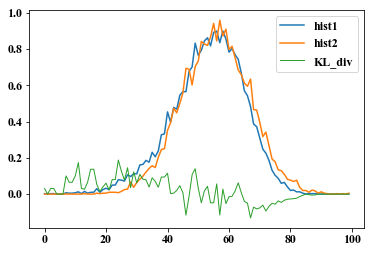

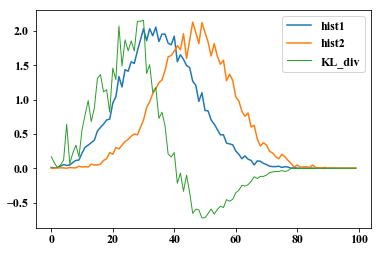

a:  5 l:  7


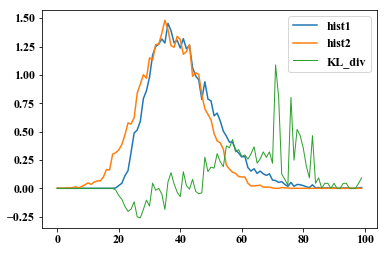

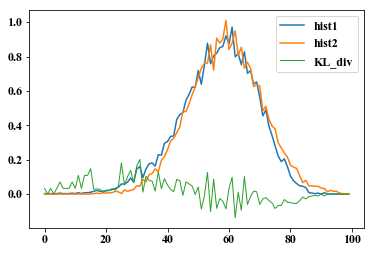

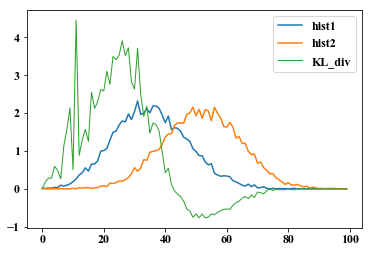

a:  5 l:  8


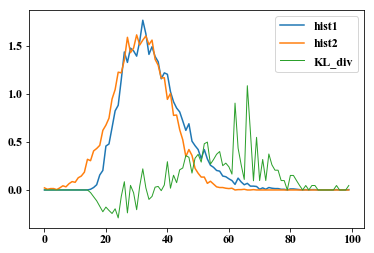

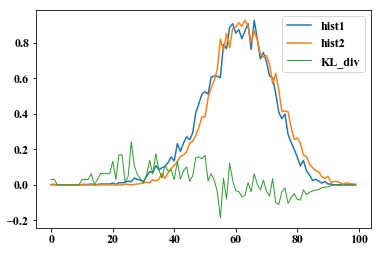

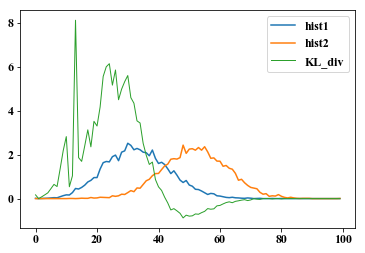

a:  5 l:  9


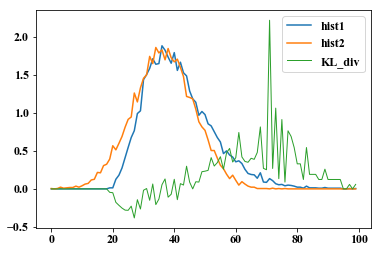

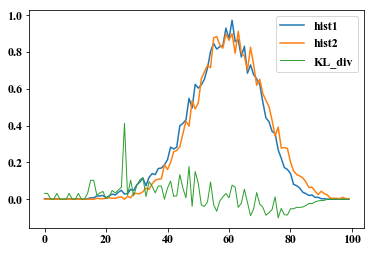

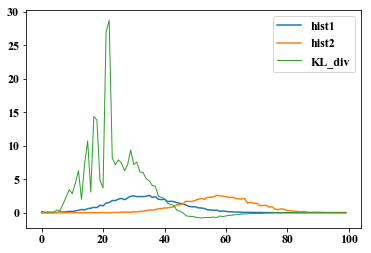

a:  5 l:  10


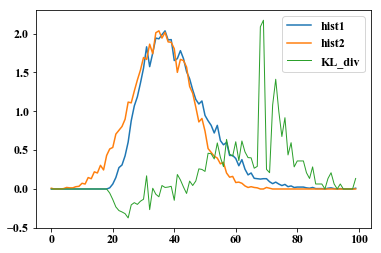

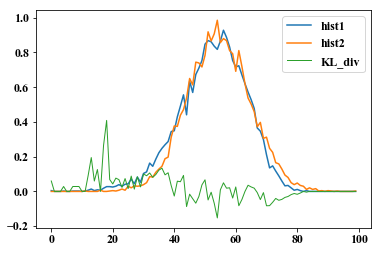

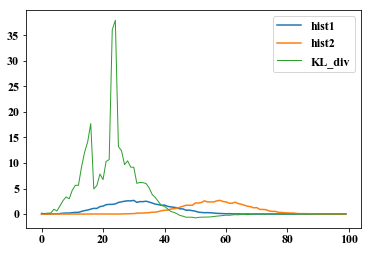

a:  5 l:  11


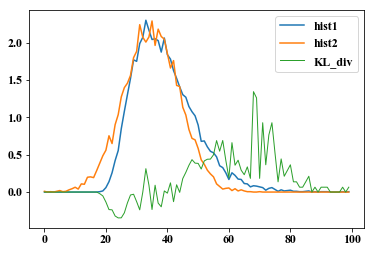

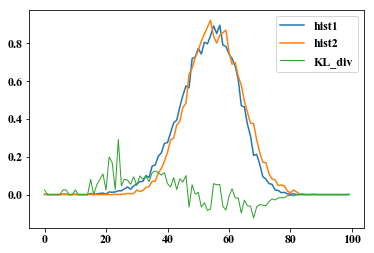

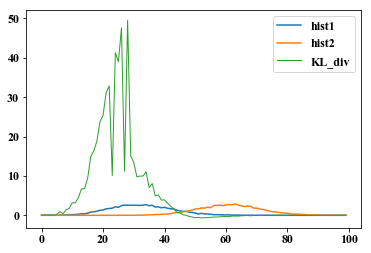

a:  6 l:  2


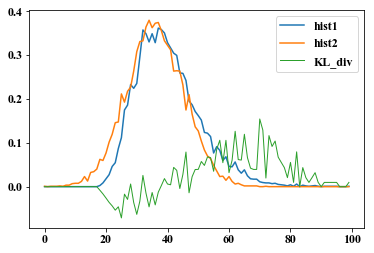

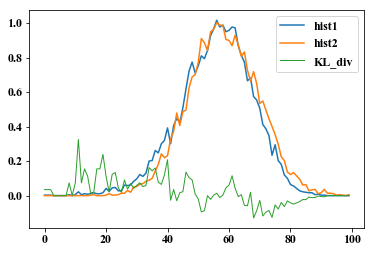

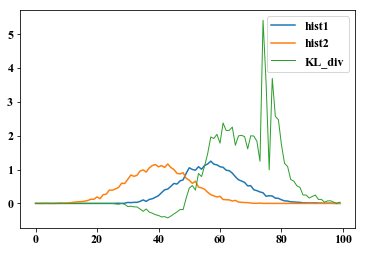

a:  6 l:  3


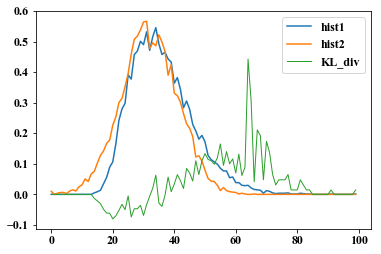

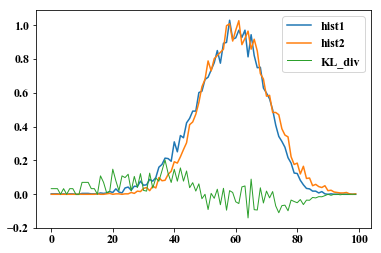

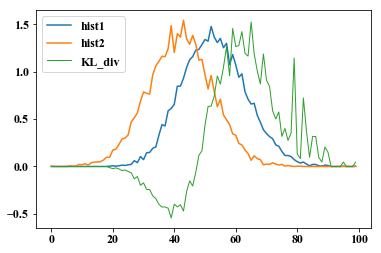

a:  6 l:  4


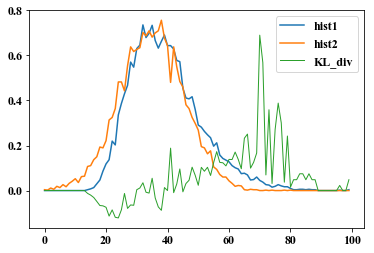

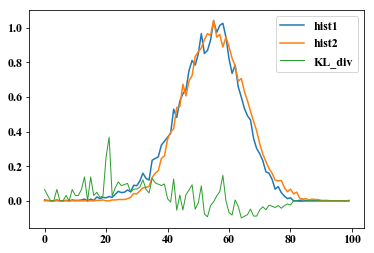

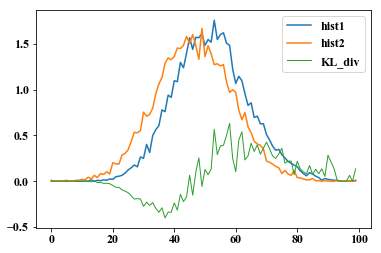

a:  6 l:  5


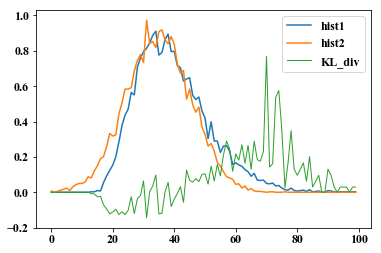

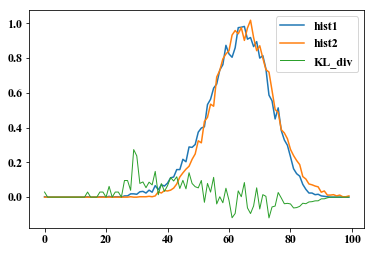

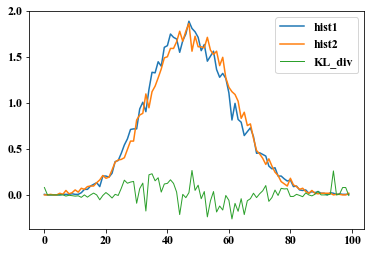

a:  6 l:  6


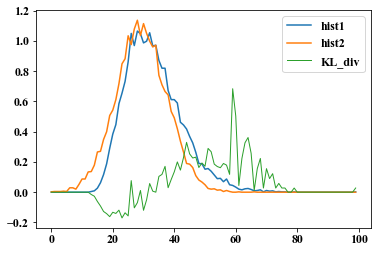

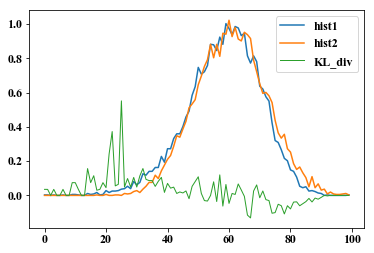

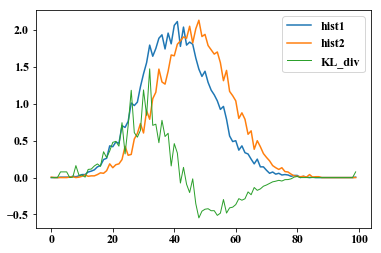

a:  6 l:  7


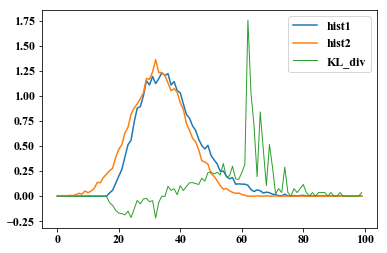

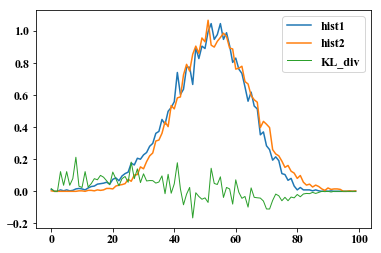

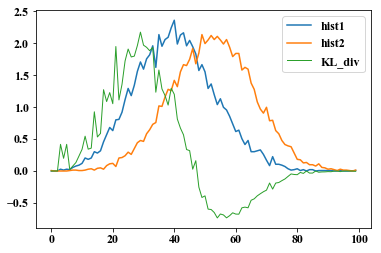

a:  6 l:  8


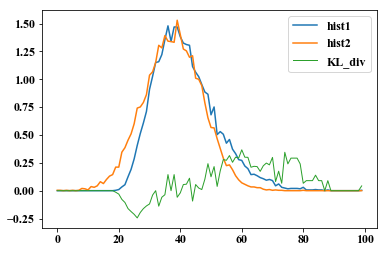

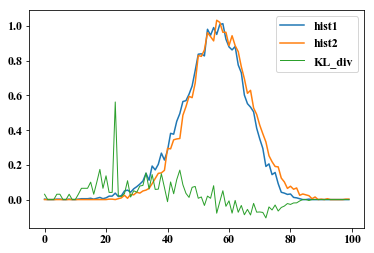

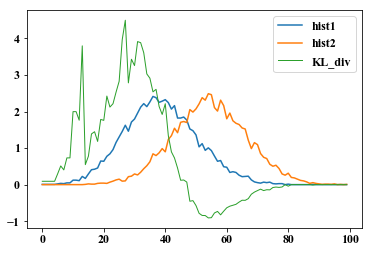

a:  6 l:  9


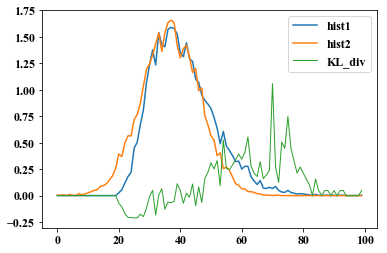

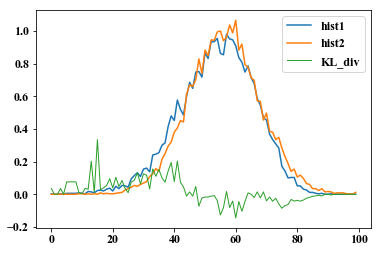

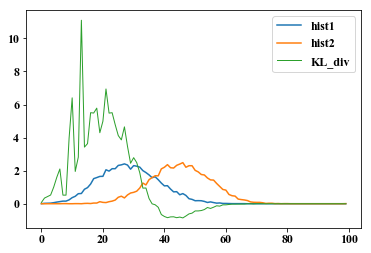

a:  6 l:  10


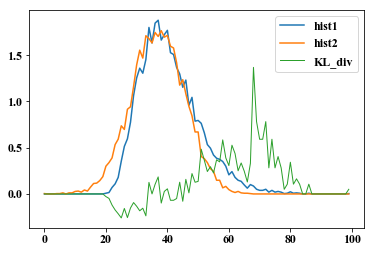

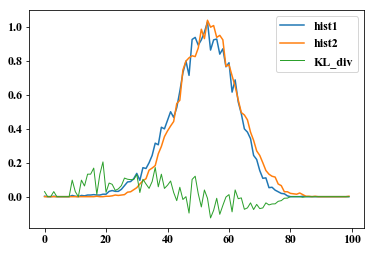

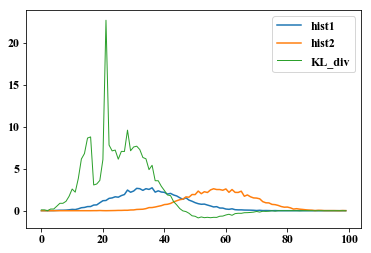

a:  6 l:  11


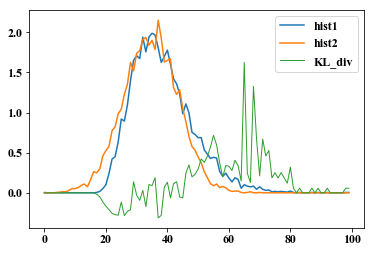

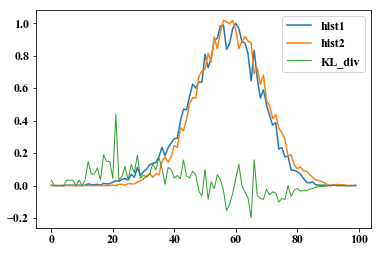

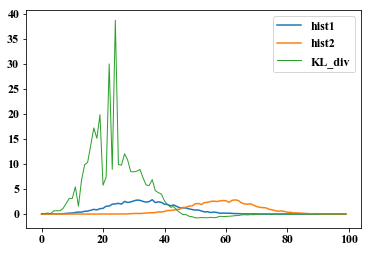

a:  7 l:  2


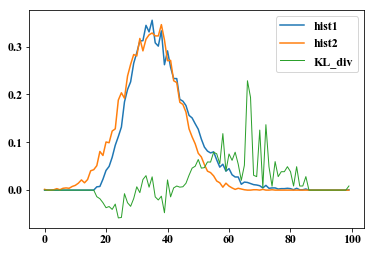

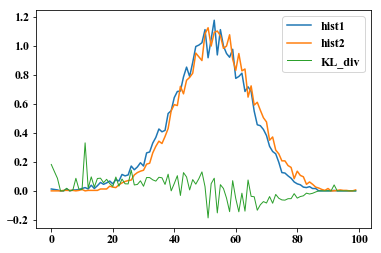

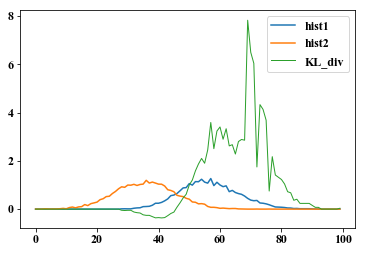

a:  7 l:  3


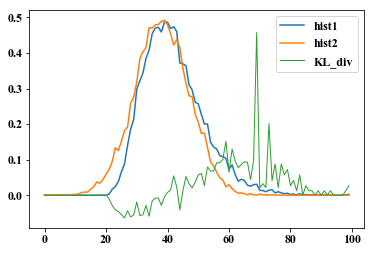

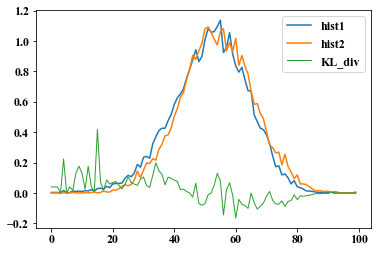

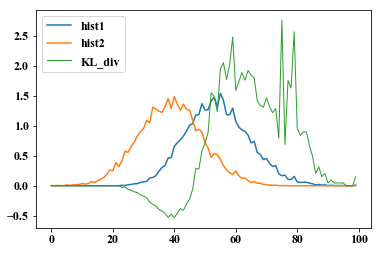

a:  7 l:  4


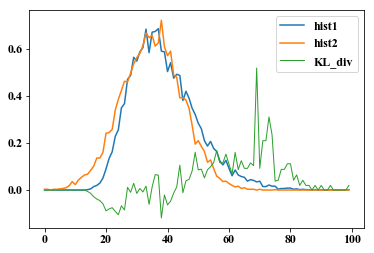

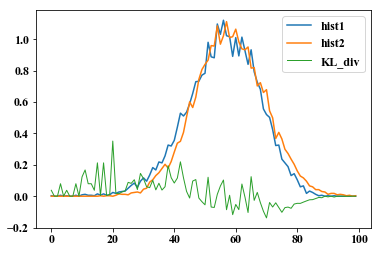

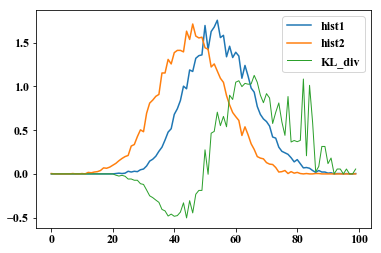

a:  7 l:  5


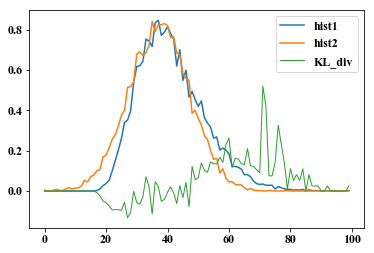

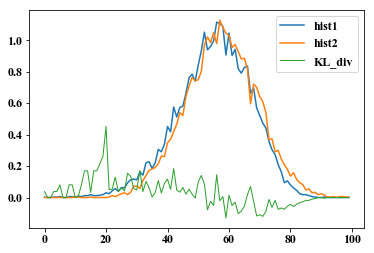

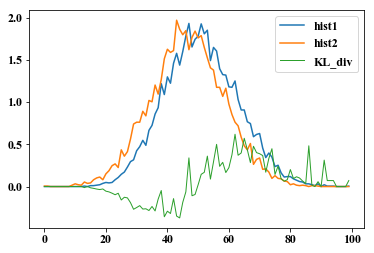

a:  7 l:  6


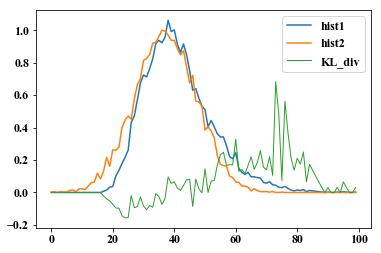

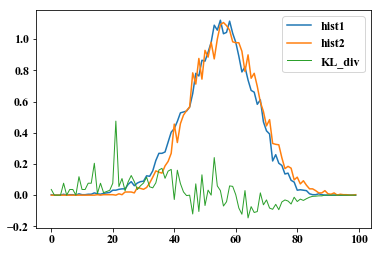

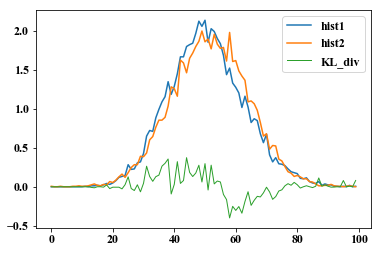

a:  7 l:  7


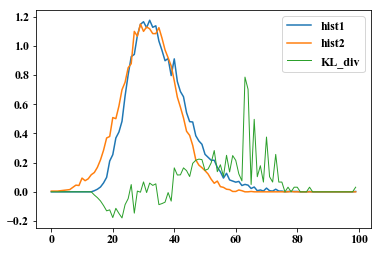

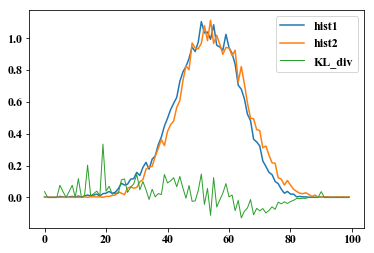

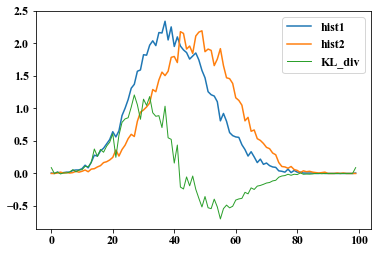

a:  7 l:  8


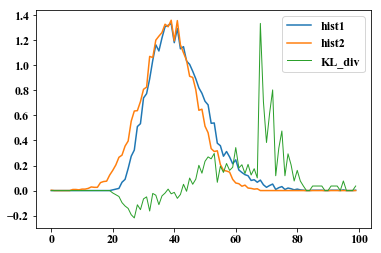

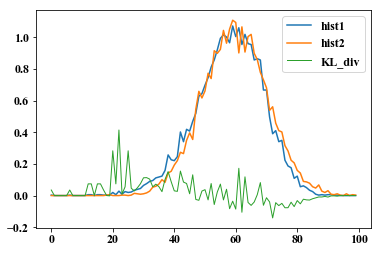

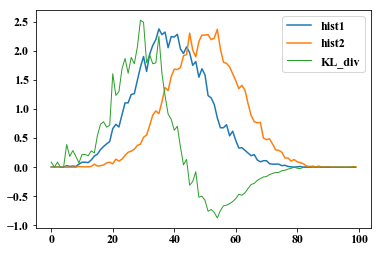

a:  7 l:  9


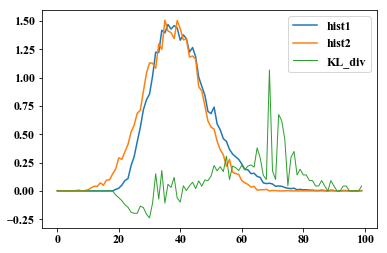

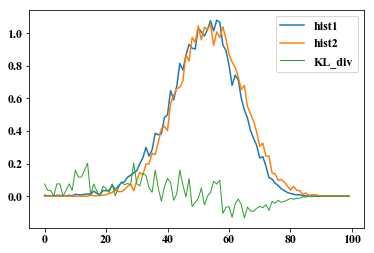

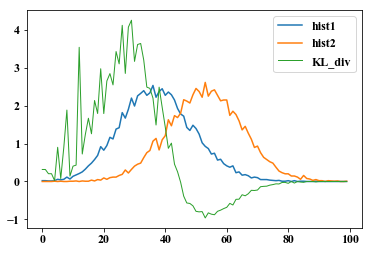

a:  7 l:  10


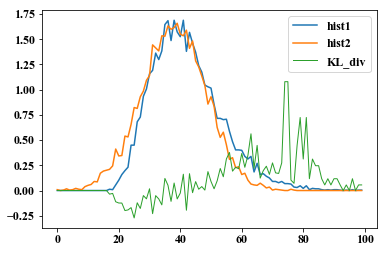

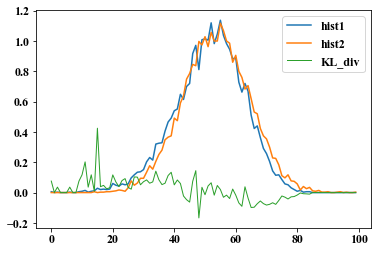

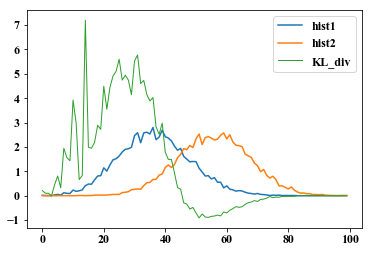

a:  7 l:  11


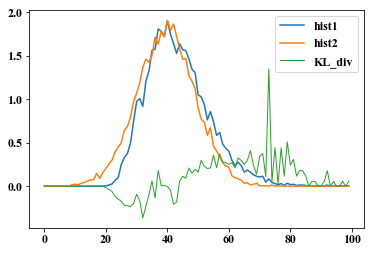

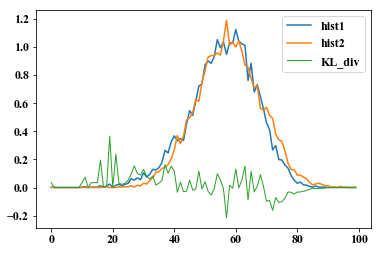

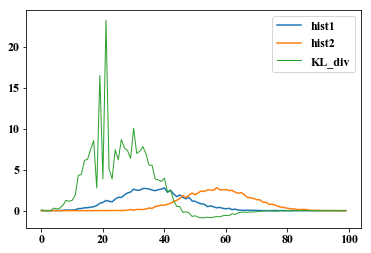

a:  8 l:  2


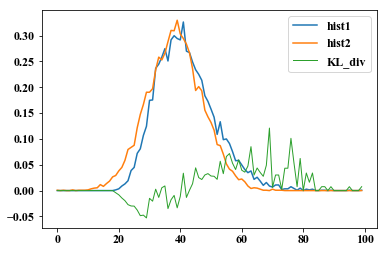

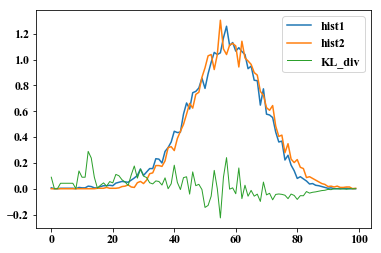

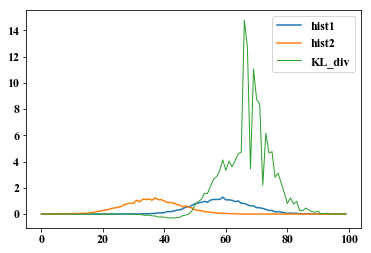

a:  8 l:  3


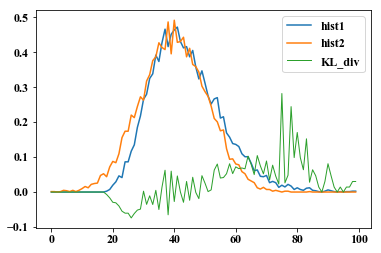

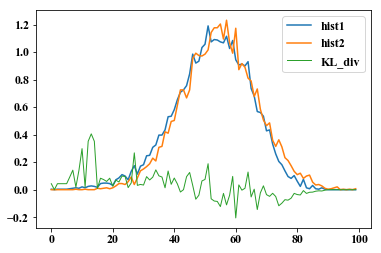

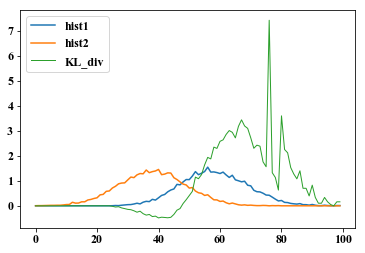

a:  8 l:  4


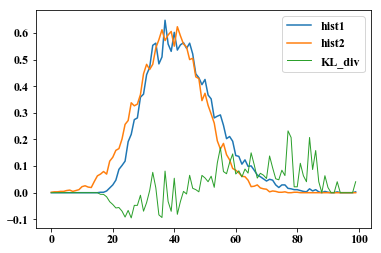

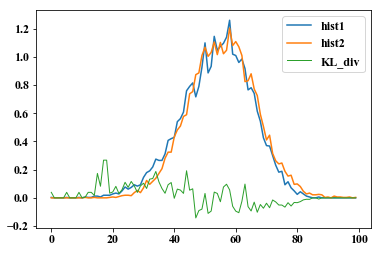

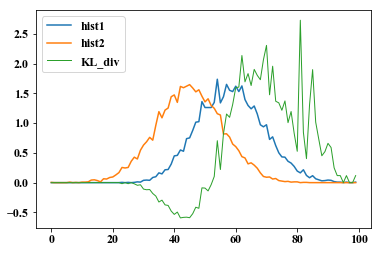

a:  8 l:  5


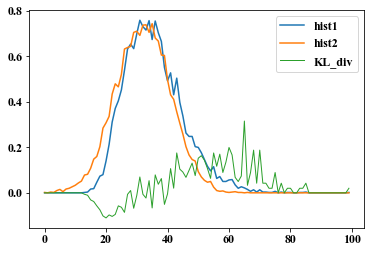

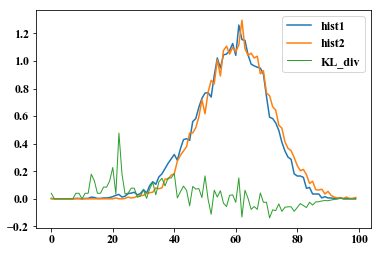

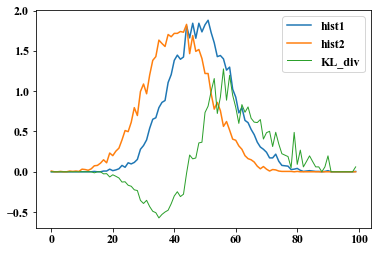

a:  8 l:  6


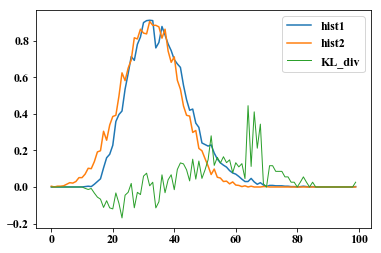

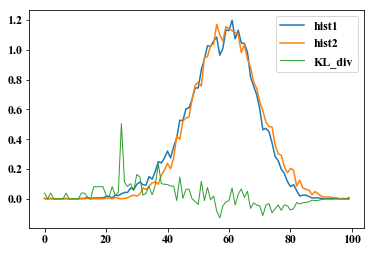

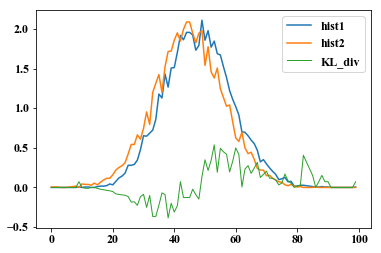

a:  8 l:  7


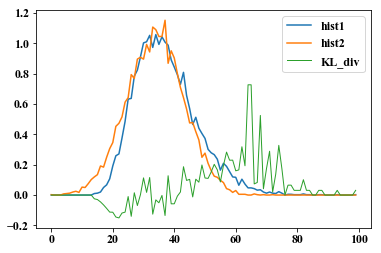

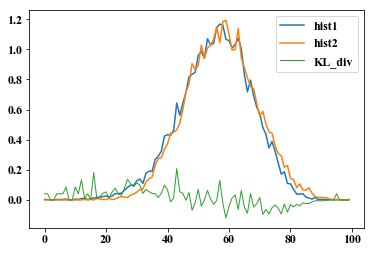

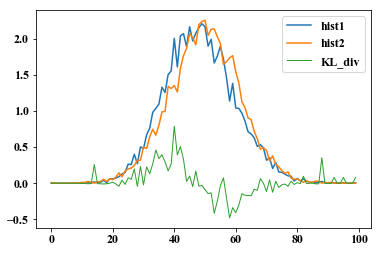

a:  8 l:  8


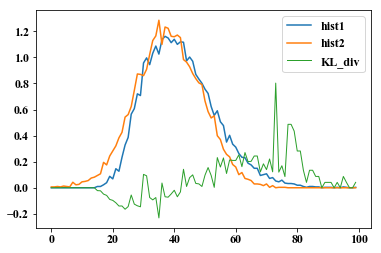

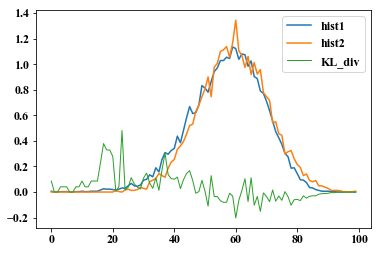

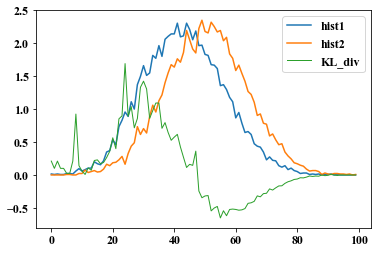

a:  8 l:  9


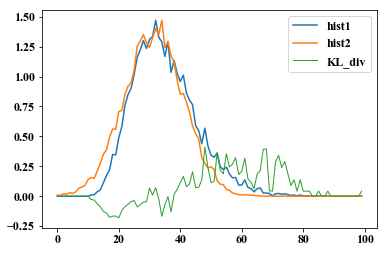

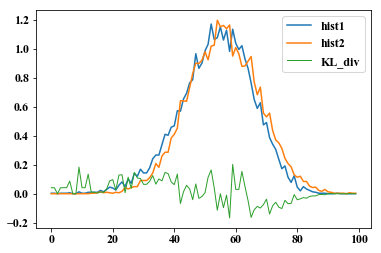

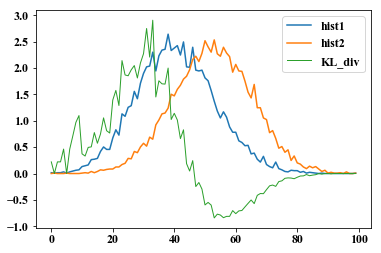

a:  8 l:  10


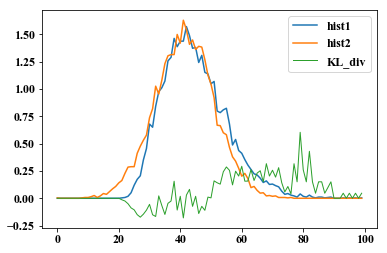

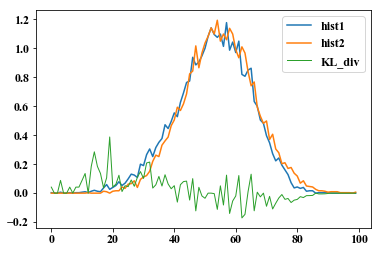

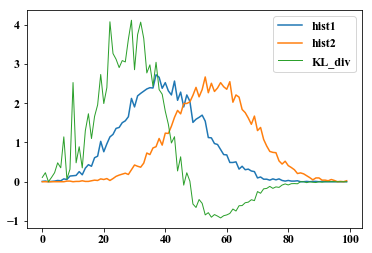

a:  8 l:  11


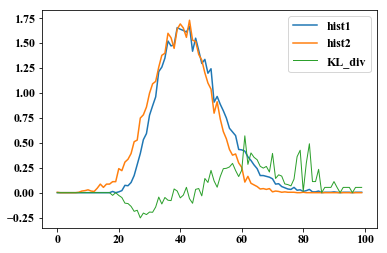

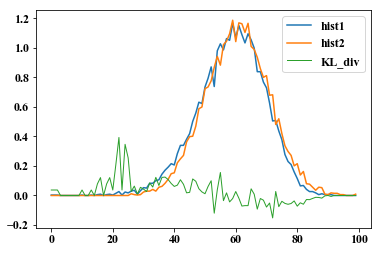

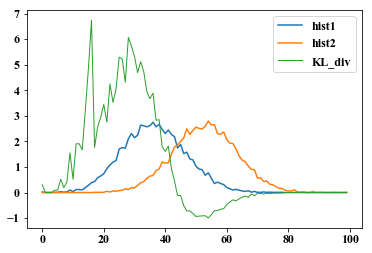

a:  9 l:  2


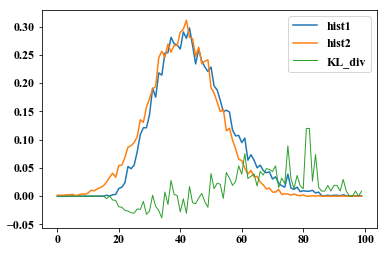

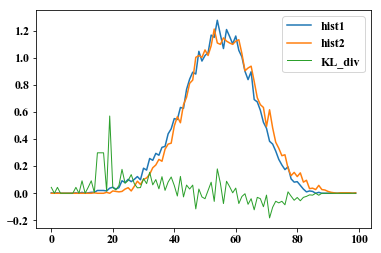

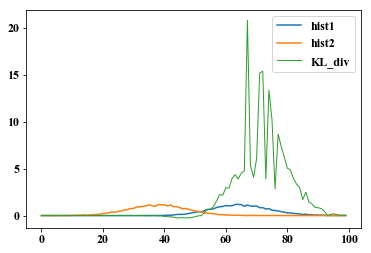

a:  9 l:  3


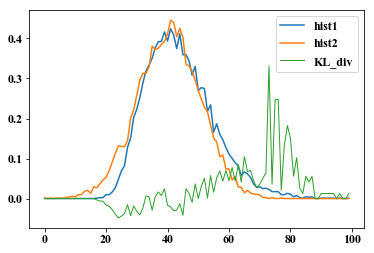

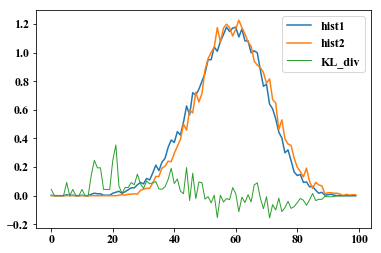

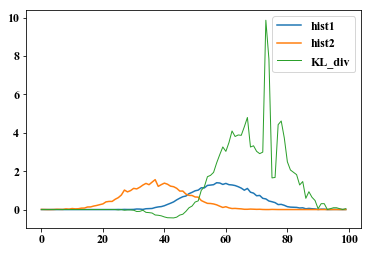

a:  9 l:  4


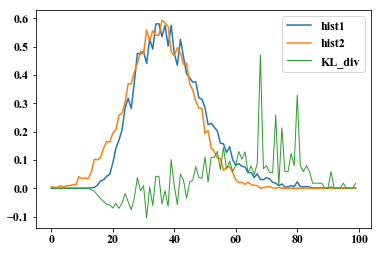

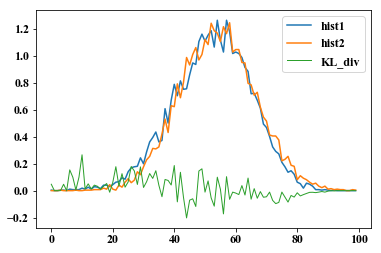

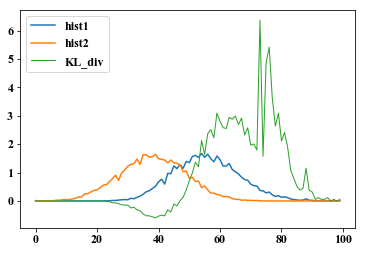

a:  9 l:  5


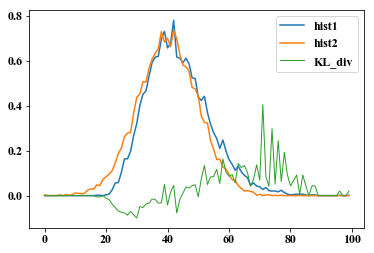

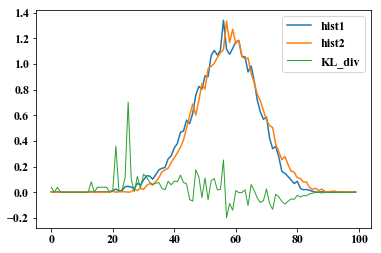

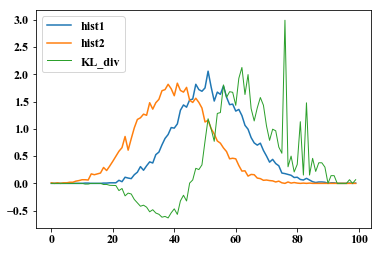

a:  9 l:  6


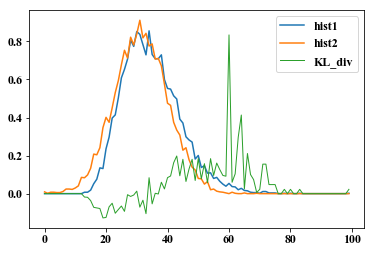

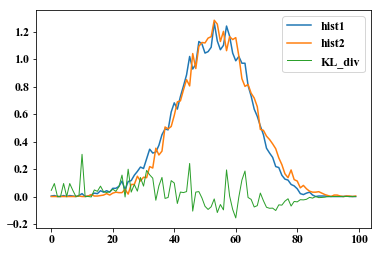

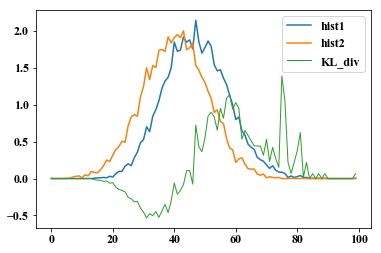

a:  9 l:  7


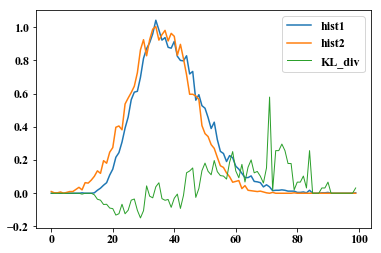

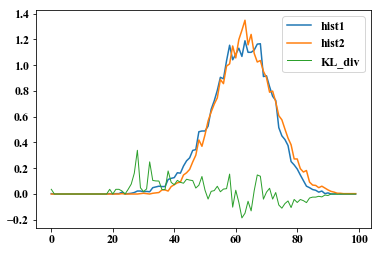

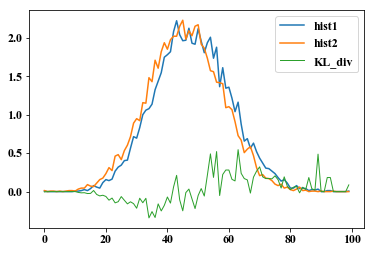

a:  9 l:  8


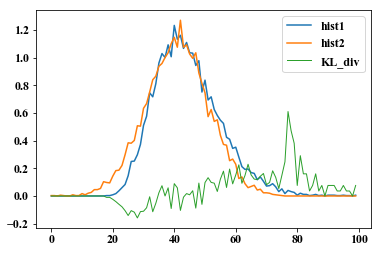

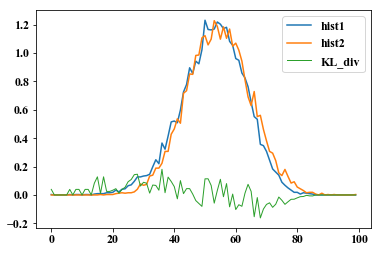

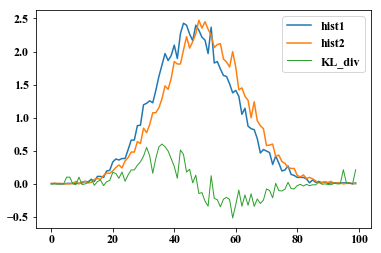

a:  9 l:  9


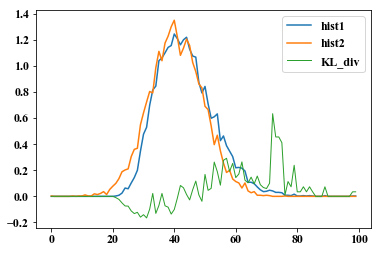

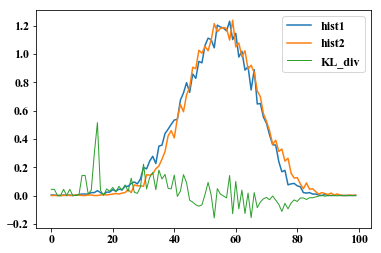

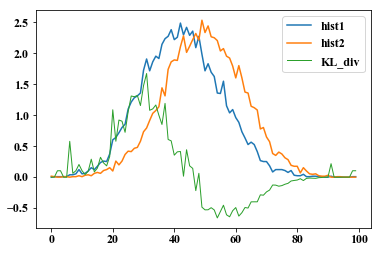

a:  9 l:  10


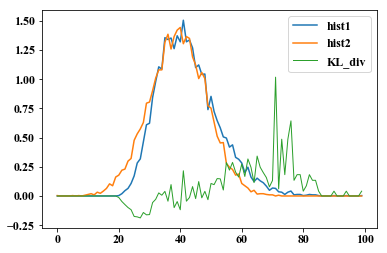

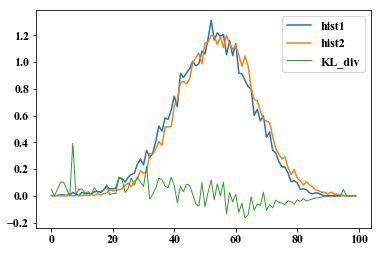

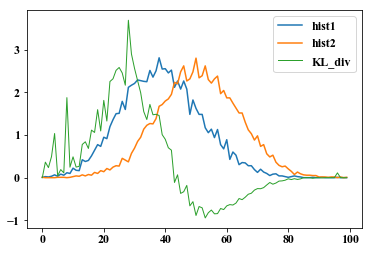

a:  9 l:  11


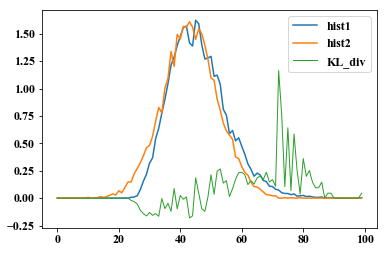

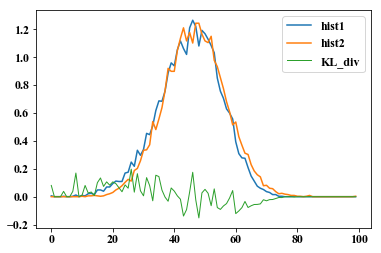

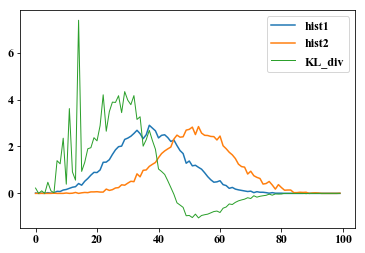

a:  10 l:  2


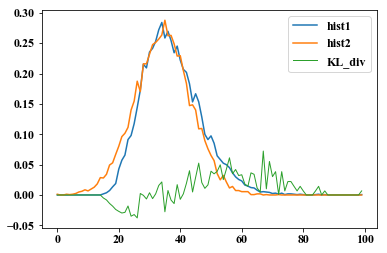

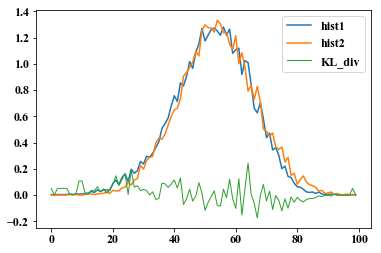

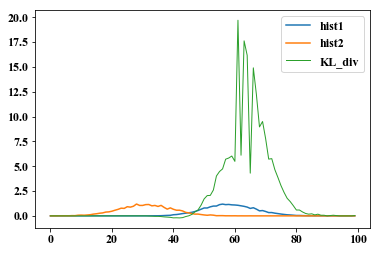

a:  10 l:  3


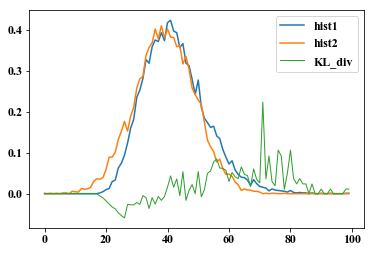

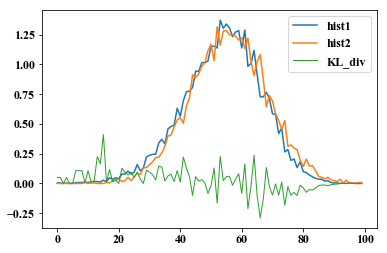

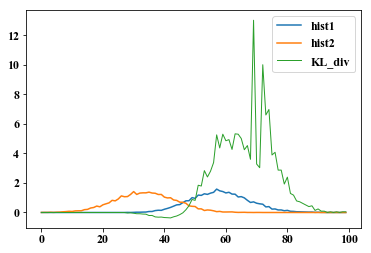

a:  10 l:  4


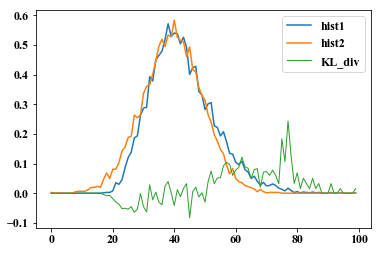

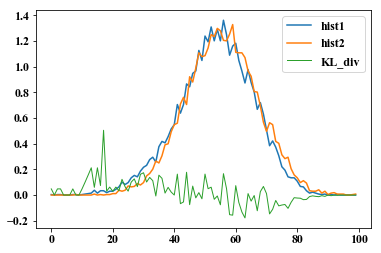

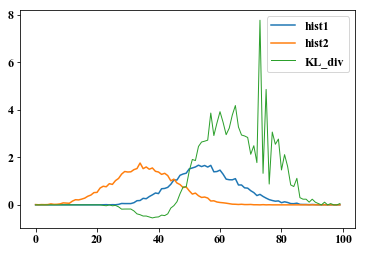

a:  10 l:  5


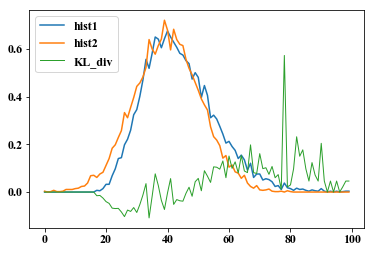

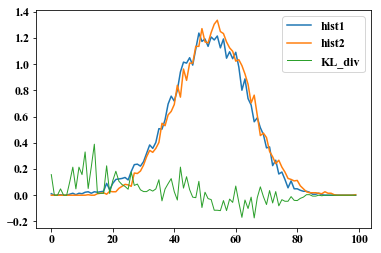

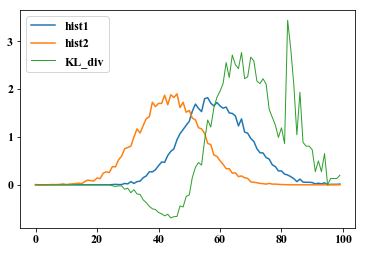

a:  10 l:  6


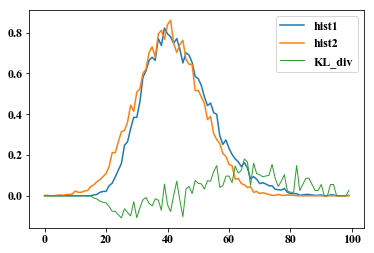

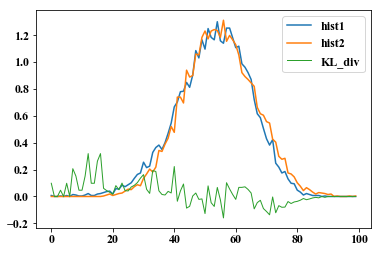

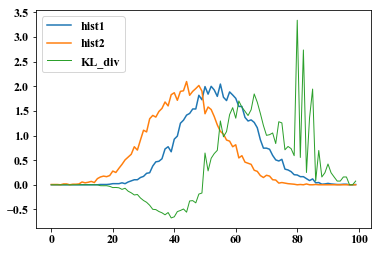

a:  10 l:  7


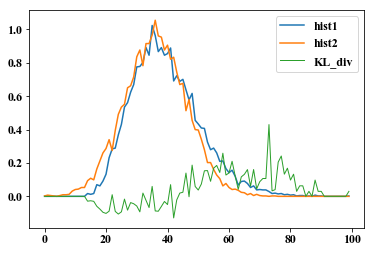

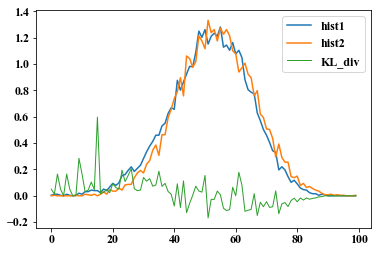

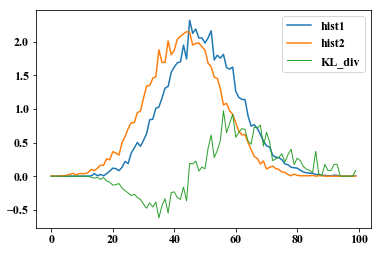

a:  10 l:  8


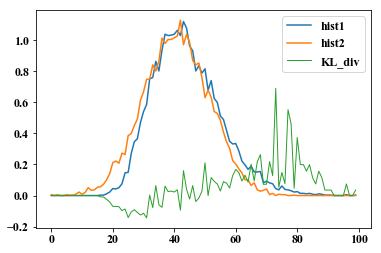

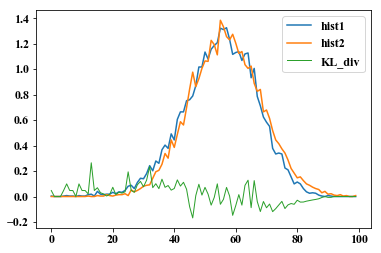

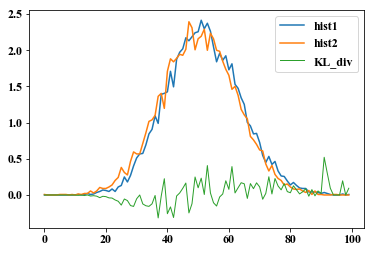

a:  10 l:  9


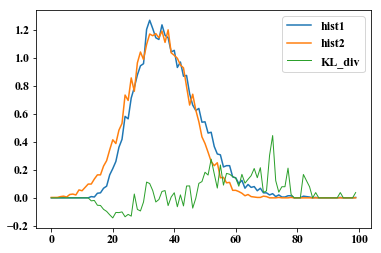

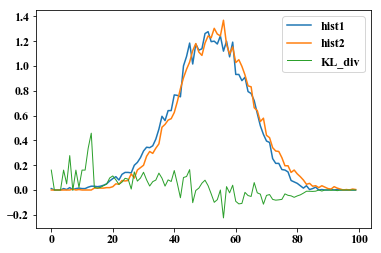

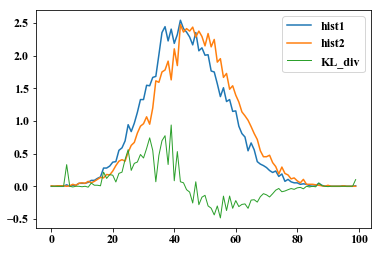

a:  10 l:  10


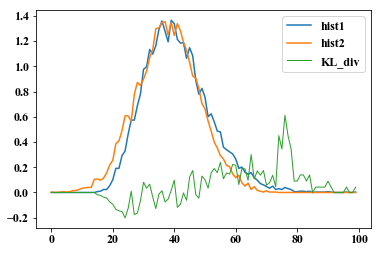

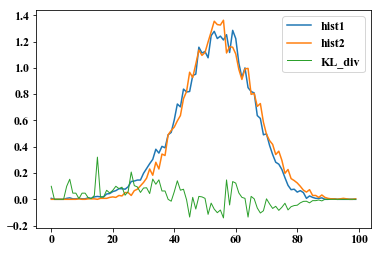

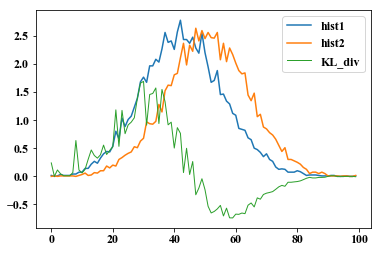

a:  10 l:  11


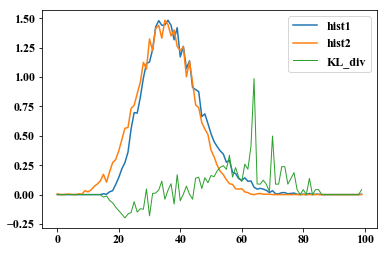

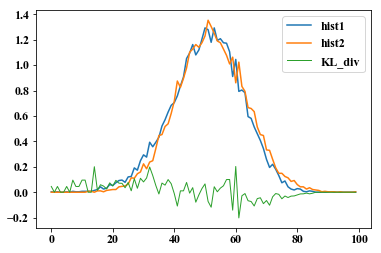

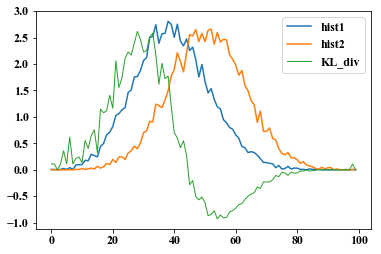

(130.44950561942025, 2.4386392818928413, 201.26589689321568)


In [36]:
print(KL_div_samples_combinations(params = [range(1,11), range(2, 12)], n_samples=10000, plot=True))

# Statistical distance measures for small, medium and large $\theta$

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: Runtime

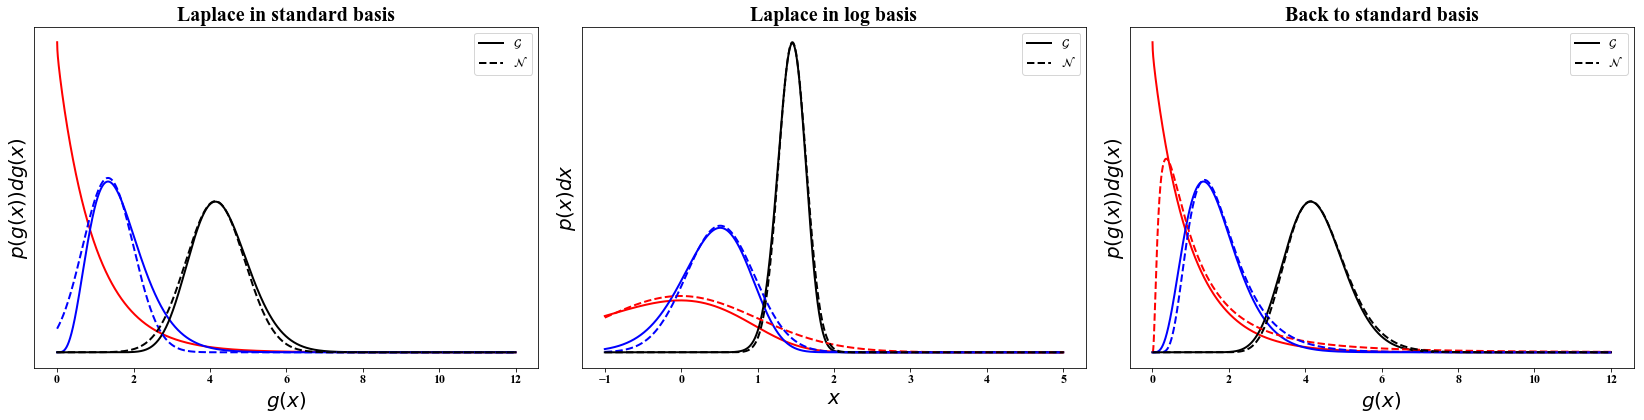

In [37]:
a_s, l_s = 0.99,1
a_m, l_m = 5,3
a_l, l_l = 30, 7
plot_gamma_t_log(params=[[a_s, l_s], [a_m, l_m], [a_l, l_l]])

## calculate MMD for the three pairs of parameters

In [38]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [[a_s], [l_s]], n_samples=2000)
    MMD_m = MMD_combinations(params = [[a_m], [l_m]], n_samples=2000)
    MMD_l = MMD_combinations(params = [[a_l], [l_l]], n_samples=2000)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

seed:  0
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.024899005889892578 sqrt:  0.015604019165039062
a:  5 l:  3
standard:  0.028749525547027588 log:  0.0047266483306884766 sqrt:  0.00015044212341308594
a:  30 l:  7
standard:  0.0017289519309997559 log:  0.0002828240394592285 sqrt:  8.034706115722656e-05
seed:  1
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.027429819107055664 sqrt:  0.017890095710754395
a:  5 l:  3
standard:  0.023804128170013428 log:  0.0019773244857788086 sqrt:  0.0006148815155029297
a:  30 l:  7
standard:  0.005283534526824951 log:  0.00046265125274658203 sqrt:  -1.4901161193847656e-06
seed:  2
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.030288636684417725 sqrt:  0.014611542224884033
a:  5 l:  3
standard:  0.024688005447387695 log:  0.005449891090393066 sqrt:  0.0004582405090332031
a:  30 l:  7
standard:  0.003480970859527588 log:  0.00020486116409301758 sqrt:  0.0001242

In [39]:
# normalize to 1 for comparison
MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[       nan 1.         0.57983844]
[1.         0.20650273 0.03088219]
[1.         0.04889628 0.02437365]


## calculate KL div for the three lambdas

In [40]:
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    KL_s = KL_div_pdf_combinations(params = [[a_s], [l_s]])
    KL_m = KL_div_pdf_combinations(params = [[a_m], [l_m]])
    KL_l = KL_div_pdf_combinations(params = [[a_l], [l_l]], plot=False)
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

seed:  0
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  1
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  2
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  3
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  4
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  5
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  6
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  7
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  8
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
seed:  9
a:  0.99 l:  1
a < 1: not legitimate in standard base
a:  5 l:  3
a:  30 l:  7
[         nan  79.07229272 151.12592899]
[69.13051807 32.26593857 43.55233852]
[24.6683562  11.55986552 15.34914343]


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


In [41]:
# normalize to 1 for comparison
KL_results_mean_s[0] = KL_results_mean_s[1:].max()
KL_results_mean_s_normalized = KL_results_mean_s/KL_results_mean_s.max()
KL_results_mean_s_normalized[0] = np.nan
print(KL_results_mean_s_normalized)
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[       nan 0.52322122 1.        ]
[1.         0.46673943 0.63000162]
[1.         0.4686111  0.62221995]
